# Importing Required Libraries

In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Importing Data

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Dataset Preparation

In [6]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)

In [ ]:
markdown
Notebook removed. See README for details.
4
5
cell_type
id
metadata
source

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [12]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [13]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

# Exploratory Data Analysis

<AxesSubplot:>

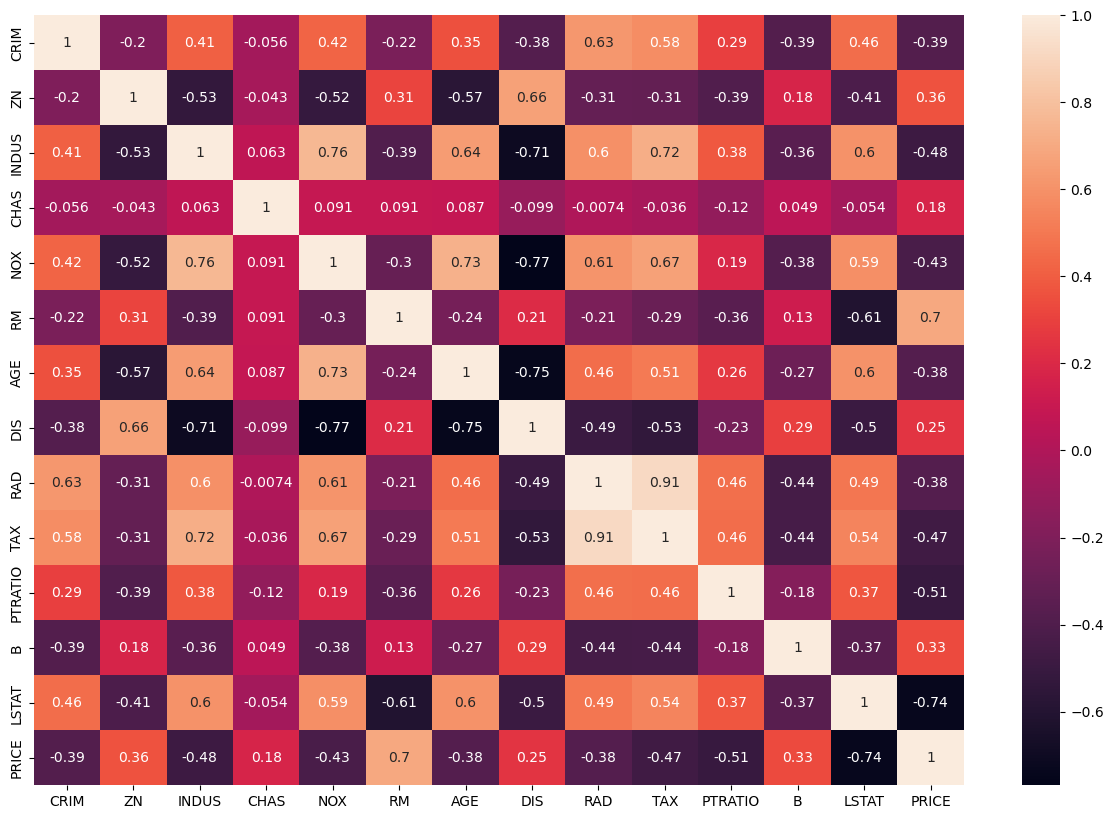

In [14]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True)

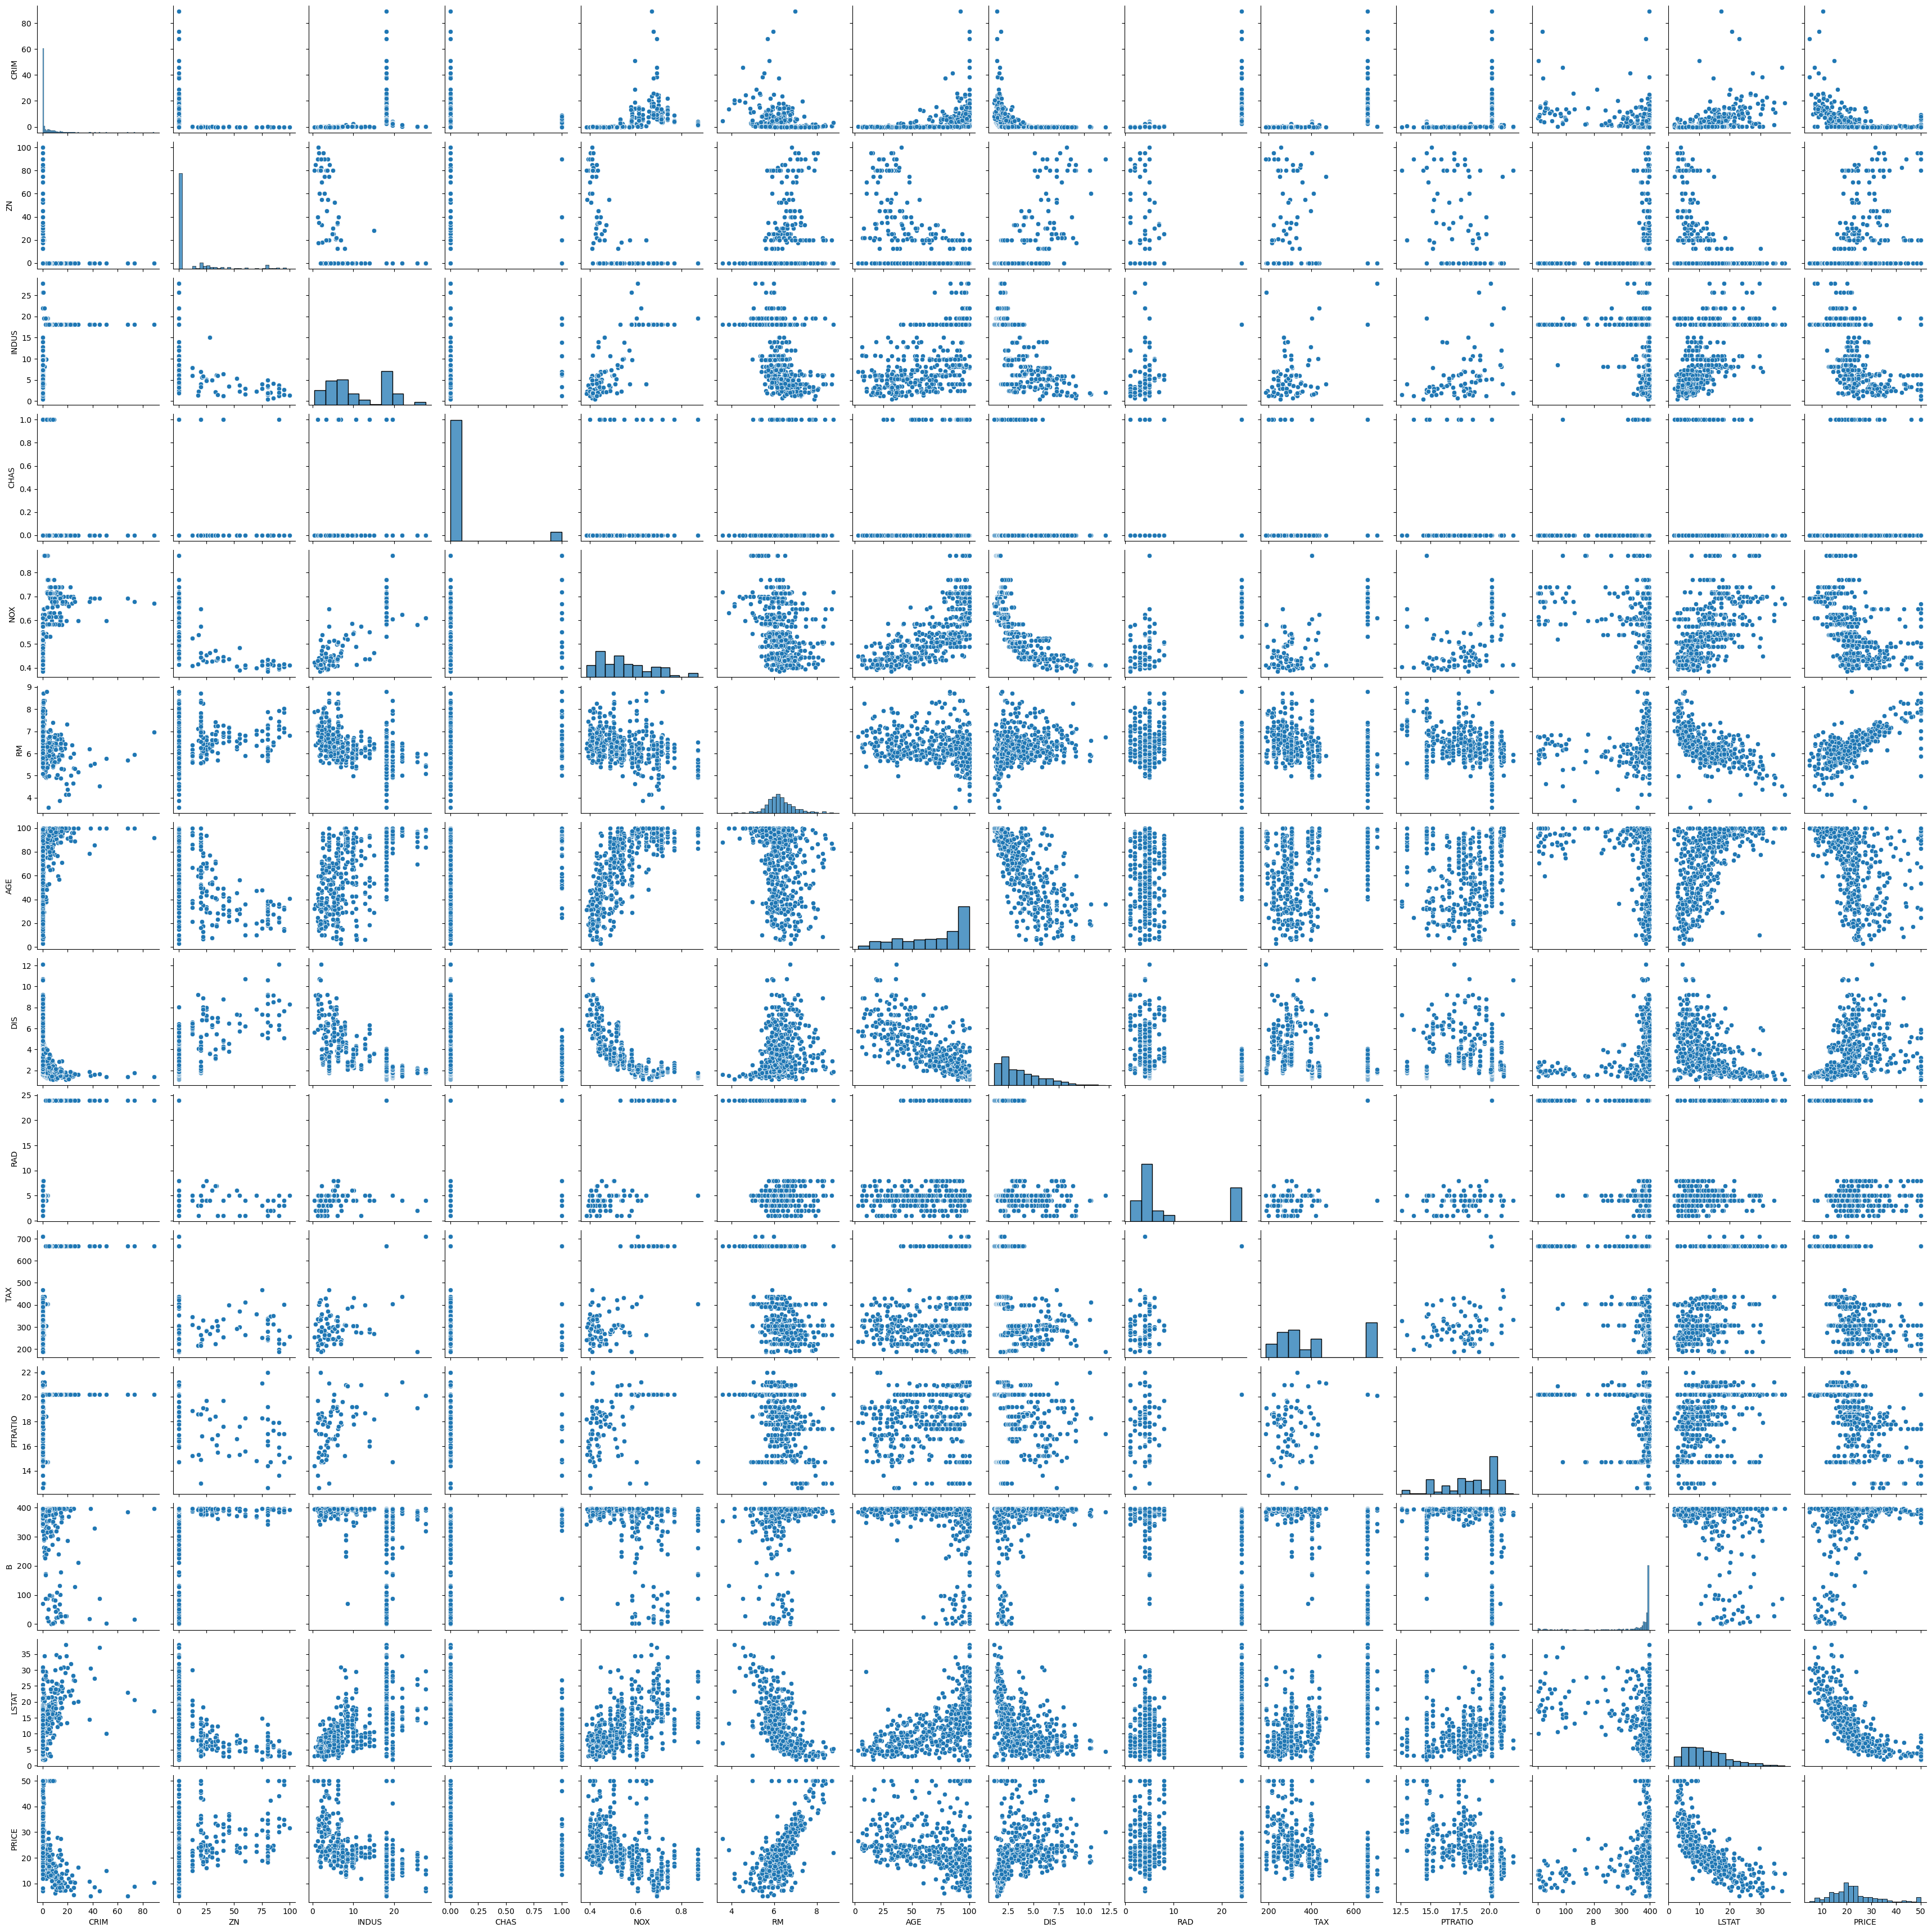

In [15]:
sns.pairplot(df)

<AxesSubplot:xlabel='CRIM', ylabel='PRICE'>

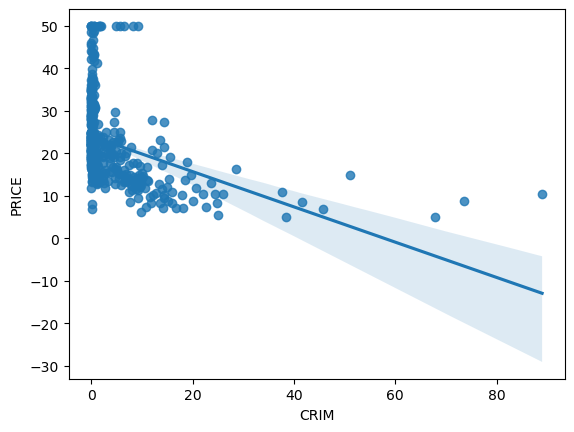

In [16]:
sns.regplot(x="CRIM",y="PRICE",data=df)

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

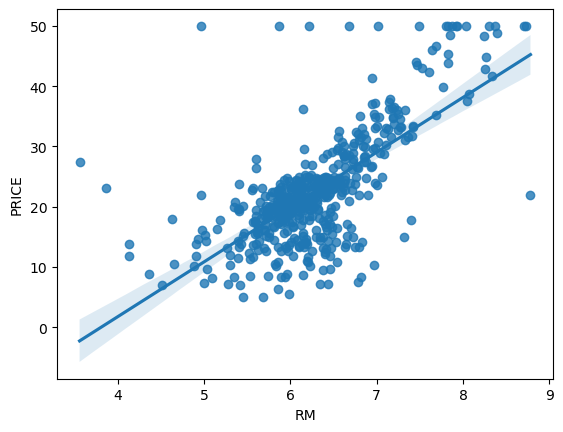

In [17]:
sns.regplot(x="RM",y="PRICE",data=df)

<AxesSubplot:xlabel='INDUS', ylabel='PRICE'>

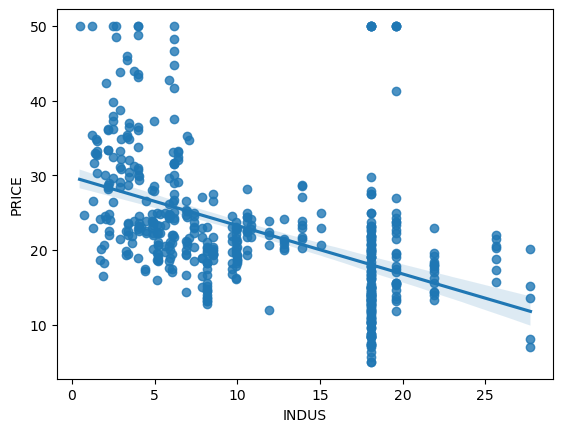

In [18]:
sns.regplot(x="INDUS",y="PRICE",data=df)

<AxesSubplot:xlabel='CHAS', ylabel='PRICE'>

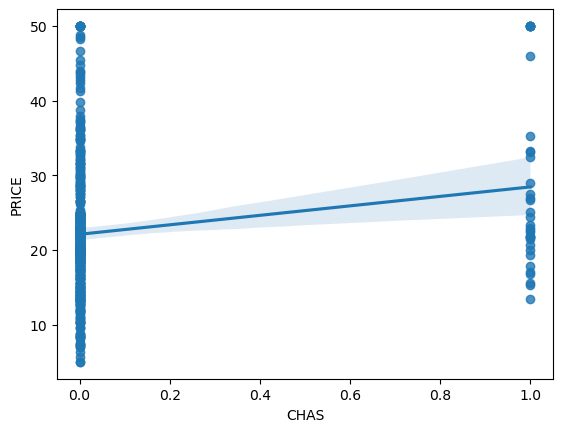

In [19]:
sns.regplot(x="CHAS",y="PRICE",data=df)

<AxesSubplot:xlabel='ZN', ylabel='PRICE'>

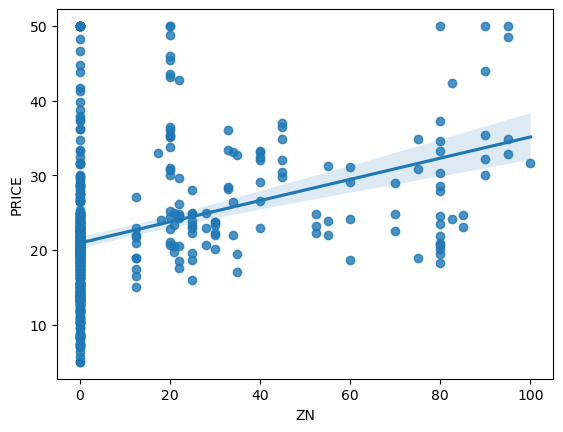

In [20]:
sns.regplot(x="ZN",y="PRICE",data=df)

<AxesSubplot:xlabel='NOX', ylabel='PRICE'>

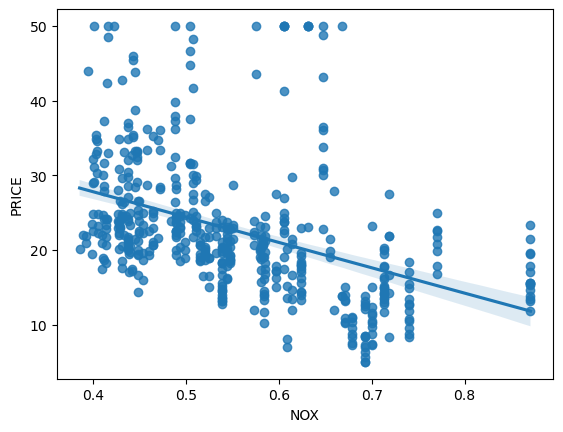

In [21]:
sns.regplot(x="NOX",y="PRICE",data=df)

<AxesSubplot:xlabel='AGE', ylabel='PRICE'>

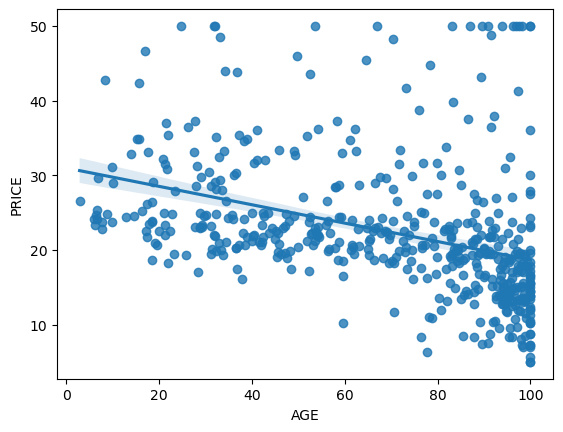

In [22]:
sns.regplot(x="AGE",y="PRICE",data=df)

In [23]:
sns.regplot(x="DIS",y="PRICE",data=df)

<AxesSubplot:xlabel='DIS', ylabel='PRICE'>

In [24]:
sns.regplot(x="RAD",y="PRICE",data=df)

<AxesSubplot:xlabel='RAD', ylabel='PRICE'>

In [25]:
sns.regplot(x="TAX",y="PRICE",data=df)

<AxesSubplot:xlabel='TAX', ylabel='PRICE'>

<AxesSubplot:xlabel='PTRATIO', ylabel='PRICE'>

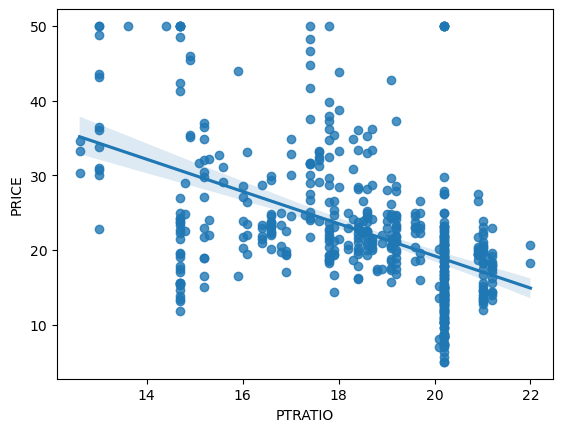

In [26]:
sns.regplot(x="PTRATIO",y="PRICE",data=df)

In [27]:
sns.regplot(x="B",y="PRICE",data=df)

<AxesSubplot:xlabel='B', ylabel='PRICE'>

In [28]:
sns.regplot(x="LSTAT",y="PRICE",data=df)

<AxesSubplot:xlabel='LSTAT', ylabel='PRICE'>

# Data Preparation

In [29]:
x = df.drop("PRICE",axis=1)

y = df['PRICE']

In [30]:
x

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [31]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [33]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(506, 13)
(404, 13)
(102, 13)


In [34]:
ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test  = ss.transform(x_test)

In [35]:
x_train

array([[-0.42054453,  0.41117689, -0.84923313, ..., -0.81846496,
         0.44047695,  0.05497058],
       [ 1.05813   , -0.47409775,  0.94239807, ...,  0.77079638,
        -2.32930526,  0.03795721],
       [-0.25278198, -0.47409775, -0.48975657, ...,  1.14474022,
        -1.10359222,  1.03182129],
       ...,
       [-0.16849289, -0.47409775,  0.94239807, ...,  0.77079638,
         0.18010861,  0.03937499],
       [-0.41170669, -0.47409775,  2.02801729, ...,  0.25662359,
         0.3299541 ,  0.24778871],
       [-0.34647689,  0.36902095, -1.08936348, ..., -2.59469822,
         0.40734107, -0.37036355]])

In [36]:
x_test

array([[-0.42428043,  0.91704811, -1.3467487 , ..., -0.07057727,
         0.41740766, -0.58586618],
       [-0.42790407,  2.05525837, -1.23890573, ..., -1.37938073,
         0.41751252, -1.13880054],
       [-0.42636633,  2.89837708, -1.17563785, ..., -1.14566583,
         0.45452824, -1.18984064],
       ...,
       [-0.41621972, -0.47409775, -0.4293645 , ...,  1.09799724,
         0.43712142, -0.11232751],
       [-0.41898478,  0.79058031, -0.95132447, ..., -0.91195092,
         0.20129041, -0.26119446],
       [-0.40513088, -0.47409775, -0.4293645 , ...,  1.09799724,
        -2.96496891, -0.3448435 ]])

# Model Training

# Linear Regression

In [39]:
from catboost import CatBoostRegressor

lr = CatBoostRegressor()

param_dist = {
    'depth': [4, 6, 8],
    'learning_rate': [0.1, 0.01, 0.001],
    'l2_leaf_reg': [1, 3, 5, 7],
    'bagging_temperature': [0.5, 1, 1.5],
    'random_strength': [0.5, 1, 1.5],
    'border_count': [32, 64, 128],
    'iterations': [100, 200, 300],
}

random_search = RandomizedSearchCV(lr, param_distributions=param_dist, n_iter=20, cv=5)

In [40]:
random_search.fit(x_train,y_train)

0:	learn: 8.7745314	total: 145ms	remaining: 28.9s
1:	learn: 8.7312032	total: 147ms	remaining: 14.6s
2:	learn: 8.6865938	total: 149ms	remaining: 9.79s
3:	learn: 8.6417156	total: 151ms	remaining: 7.41s
4:	learn: 8.6061593	total: 153ms	remaining: 5.98s
5:	learn: 8.5662736	total: 155ms	remaining: 5.01s
6:	learn: 8.5302348	total: 157ms	remaining: 4.32s
7:	learn: 8.4814172	total: 159ms	remaining: 3.8s
8:	learn: 8.4445400	total: 160ms	remaining: 3.4s
9:	learn: 8.4027045	total: 162ms	remaining: 3.08s
10:	learn: 8.3592191	total: 164ms	remaining: 2.82s
11:	learn: 8.3166544	total: 166ms	remaining: 2.6s
12:	learn: 8.2782065	total: 168ms	remaining: 2.41s
13:	learn: 8.2393568	total: 169ms	remaining: 2.25s
14:	learn: 8.1978199	total: 170ms	remaining: 2.1s
15:	learn: 8.1537566	total: 172ms	remaining: 1.98s
16:	learn: 8.1160717	total: 173ms	remaining: 1.86s
17:	learn: 8.0792274	total: 175ms	remaining: 1.77s
18:	learn: 8.0339821	total: 176ms	remaining: 1.68s
19:	learn: 7.9949537	total: 178ms	remaining: 

31:	learn: 7.6889943	total: 46.9ms	remaining: 246ms
32:	learn: 7.6550627	total: 48.9ms	remaining: 247ms
33:	learn: 7.6212604	total: 50.1ms	remaining: 245ms
34:	learn: 7.5877090	total: 51.3ms	remaining: 242ms
35:	learn: 7.5456588	total: 52.6ms	remaining: 240ms
36:	learn: 7.5049483	total: 53.8ms	remaining: 237ms
37:	learn: 7.4685777	total: 54.9ms	remaining: 234ms
38:	learn: 7.4292585	total: 56ms	remaining: 231ms
39:	learn: 7.3970275	total: 57.2ms	remaining: 229ms
40:	learn: 7.3646522	total: 58.4ms	remaining: 226ms
41:	learn: 7.3262375	total: 59.8ms	remaining: 225ms
42:	learn: 7.2932813	total: 61.2ms	remaining: 223ms
43:	learn: 7.2663978	total: 62.4ms	remaining: 221ms
44:	learn: 7.2316337	total: 63.7ms	remaining: 219ms
45:	learn: 7.2011921	total: 65.1ms	remaining: 218ms
46:	learn: 7.1750373	total: 66.1ms	remaining: 215ms
47:	learn: 7.1448228	total: 67.4ms	remaining: 213ms
48:	learn: 7.1124784	total: 68.7ms	remaining: 212ms
49:	learn: 7.0885932	total: 70.1ms	remaining: 210ms
50:	learn: 7.0

76:	learn: 6.1308759	total: 107ms	remaining: 171ms
77:	learn: 6.1119292	total: 109ms	remaining: 170ms
78:	learn: 6.0945358	total: 109ms	remaining: 167ms
79:	learn: 6.0741208	total: 110ms	remaining: 165ms
80:	learn: 6.0564696	total: 111ms	remaining: 163ms
81:	learn: 6.0344451	total: 113ms	remaining: 162ms
82:	learn: 6.0108627	total: 114ms	remaining: 160ms
83:	learn: 5.9925498	total: 114ms	remaining: 158ms
84:	learn: 5.9768985	total: 115ms	remaining: 156ms
85:	learn: 5.9540729	total: 116ms	remaining: 154ms
86:	learn: 5.9300902	total: 117ms	remaining: 153ms
87:	learn: 5.9095394	total: 119ms	remaining: 151ms
88:	learn: 5.8887912	total: 120ms	remaining: 149ms
89:	learn: 5.8681173	total: 121ms	remaining: 148ms
90:	learn: 5.8487651	total: 122ms	remaining: 146ms
91:	learn: 5.8337115	total: 123ms	remaining: 145ms
92:	learn: 5.8148251	total: 124ms	remaining: 143ms
93:	learn: 5.7921883	total: 125ms	remaining: 141ms
94:	learn: 5.7716649	total: 126ms	remaining: 139ms
95:	learn: 5.7503241	total: 127

130:	learn: 5.2058540	total: 178ms	remaining: 93.5ms
131:	learn: 5.1936696	total: 179ms	remaining: 92.4ms
132:	learn: 5.1803386	total: 181ms	remaining: 91ms
133:	learn: 5.1629682	total: 182ms	remaining: 89.4ms
134:	learn: 5.1452175	total: 183ms	remaining: 87.9ms
135:	learn: 5.1259169	total: 184ms	remaining: 86.4ms
136:	learn: 5.1120322	total: 184ms	remaining: 84.8ms
137:	learn: 5.0950286	total: 185ms	remaining: 83.3ms
138:	learn: 5.0833255	total: 186ms	remaining: 81.8ms
139:	learn: 5.0660138	total: 188ms	remaining: 80.4ms
140:	learn: 5.0499677	total: 189ms	remaining: 79ms
141:	learn: 5.0374524	total: 190ms	remaining: 77.6ms
142:	learn: 5.0224407	total: 191ms	remaining: 76.2ms
143:	learn: 5.0075458	total: 192ms	remaining: 74.8ms
144:	learn: 4.9952923	total: 193ms	remaining: 73.4ms
145:	learn: 4.9802697	total: 195ms	remaining: 72ms
146:	learn: 4.9643027	total: 196ms	remaining: 70.7ms
147:	learn: 4.9486603	total: 197ms	remaining: 69.3ms
148:	learn: 4.9379977	total: 198ms	remaining: 67.7ms

172:	learn: 4.3916401	total: 247ms	remaining: 38.6ms
173:	learn: 4.3809652	total: 250ms	remaining: 37.3ms
174:	learn: 4.3669910	total: 250ms	remaining: 35.8ms
175:	learn: 4.3593801	total: 251ms	remaining: 34.3ms
176:	learn: 4.3464778	total: 252ms	remaining: 32.8ms
177:	learn: 4.3327495	total: 253ms	remaining: 31.3ms
178:	learn: 4.3233137	total: 255ms	remaining: 29.9ms
179:	learn: 4.3115941	total: 256ms	remaining: 28.4ms
180:	learn: 4.2989737	total: 257ms	remaining: 27ms
181:	learn: 4.2893990	total: 259ms	remaining: 25.6ms
182:	learn: 4.2779821	total: 260ms	remaining: 24.1ms
183:	learn: 4.2668746	total: 261ms	remaining: 22.7ms
184:	learn: 4.2555768	total: 262ms	remaining: 21.3ms
185:	learn: 4.2483870	total: 264ms	remaining: 19.8ms
186:	learn: 4.2392659	total: 265ms	remaining: 18.4ms
187:	learn: 4.2281940	total: 266ms	remaining: 17ms
188:	learn: 4.2154920	total: 266ms	remaining: 15.5ms
189:	learn: 4.2046258	total: 267ms	remaining: 14.1ms
190:	learn: 4.1937396	total: 268ms	remaining: 12.6

41:	learn: 2.9098840	total: 247ms	remaining: 342ms
42:	learn: 2.8738985	total: 253ms	remaining: 335ms
43:	learn: 2.8355678	total: 258ms	remaining: 329ms
44:	learn: 2.7961288	total: 264ms	remaining: 323ms
45:	learn: 2.7654026	total: 271ms	remaining: 318ms
46:	learn: 2.7252165	total: 277ms	remaining: 312ms
47:	learn: 2.6847375	total: 284ms	remaining: 307ms
48:	learn: 2.6573452	total: 290ms	remaining: 302ms
49:	learn: 2.6193474	total: 297ms	remaining: 297ms
50:	learn: 2.5869705	total: 303ms	remaining: 291ms
51:	learn: 2.5547991	total: 309ms	remaining: 285ms
52:	learn: 2.5090951	total: 316ms	remaining: 280ms
53:	learn: 2.4708601	total: 324ms	remaining: 276ms
54:	learn: 2.4362320	total: 330ms	remaining: 270ms
55:	learn: 2.4156537	total: 335ms	remaining: 263ms
56:	learn: 2.3906161	total: 341ms	remaining: 258ms
57:	learn: 2.3665735	total: 348ms	remaining: 252ms
58:	learn: 2.3310272	total: 355ms	remaining: 247ms
59:	learn: 2.3049815	total: 361ms	remaining: 241ms
60:	learn: 2.2787030	total: 367

22:	learn: 4.1120565	total: 151ms	remaining: 507ms
23:	learn: 4.0270970	total: 158ms	remaining: 500ms
24:	learn: 3.9230297	total: 164ms	remaining: 493ms
25:	learn: 3.8186877	total: 170ms	remaining: 485ms
26:	learn: 3.7650152	total: 177ms	remaining: 479ms
27:	learn: 3.6808696	total: 183ms	remaining: 472ms
28:	learn: 3.5875959	total: 190ms	remaining: 465ms
29:	learn: 3.4851040	total: 193ms	remaining: 451ms
30:	learn: 3.4209881	total: 200ms	remaining: 446ms
31:	learn: 3.3653136	total: 207ms	remaining: 440ms
32:	learn: 3.3252668	total: 213ms	remaining: 433ms
33:	learn: 3.2538578	total: 221ms	remaining: 428ms
34:	learn: 3.1970252	total: 228ms	remaining: 423ms
35:	learn: 3.1348728	total: 235ms	remaining: 417ms
36:	learn: 3.0829518	total: 241ms	remaining: 411ms
37:	learn: 3.0109198	total: 248ms	remaining: 405ms
38:	learn: 2.9501070	total: 255ms	remaining: 398ms
39:	learn: 2.8762140	total: 262ms	remaining: 392ms
40:	learn: 2.8430671	total: 268ms	remaining: 386ms
41:	learn: 2.7903403	total: 276

6:	learn: 6.0115807	total: 11ms	remaining: 146ms
7:	learn: 5.7328185	total: 13.3ms	remaining: 153ms
8:	learn: 5.4834666	total: 15ms	remaining: 152ms
9:	learn: 5.2444813	total: 16.5ms	remaining: 148ms
10:	learn: 5.0404080	total: 17.7ms	remaining: 143ms
11:	learn: 4.8579692	total: 19.1ms	remaining: 140ms
12:	learn: 4.6655332	total: 20.8ms	remaining: 139ms
13:	learn: 4.5148556	total: 22.5ms	remaining: 138ms
14:	learn: 4.4038339	total: 23.7ms	remaining: 135ms
15:	learn: 4.2082454	total: 25.5ms	remaining: 134ms
16:	learn: 4.0855406	total: 27ms	remaining: 132ms
17:	learn: 3.9653116	total: 28.2ms	remaining: 128ms
18:	learn: 3.8108917	total: 29.6ms	remaining: 126ms
19:	learn: 3.7296721	total: 30.7ms	remaining: 123ms
20:	learn: 3.6396556	total: 31.7ms	remaining: 119ms
21:	learn: 3.5646773	total: 41.4ms	remaining: 147ms
22:	learn: 3.4977515	total: 42.5ms	remaining: 142ms
23:	learn: 3.4352293	total: 44ms	remaining: 139ms
24:	learn: 3.3784516	total: 45.5ms	remaining: 137ms
25:	learn: 3.3220157	tot

27:	learn: 3.0942037	total: 47ms	remaining: 121ms
28:	learn: 3.0264979	total: 49.1ms	remaining: 120ms
29:	learn: 2.9703872	total: 50.4ms	remaining: 118ms
30:	learn: 2.9095678	total: 51.6ms	remaining: 115ms
31:	learn: 2.8660289	total: 52.9ms	remaining: 112ms
32:	learn: 2.8244439	total: 54.2ms	remaining: 110ms
33:	learn: 2.7912267	total: 55.3ms	remaining: 107ms
34:	learn: 2.7428030	total: 56.6ms	remaining: 105ms
35:	learn: 2.7030669	total: 57.6ms	remaining: 102ms
36:	learn: 2.6476585	total: 58.9ms	remaining: 100ms
37:	learn: 2.6155640	total: 60.1ms	remaining: 98.1ms
38:	learn: 2.5817683	total: 61ms	remaining: 95.4ms
39:	learn: 2.5616895	total: 62.1ms	remaining: 93.1ms
40:	learn: 2.5369608	total: 63.4ms	remaining: 91.2ms
41:	learn: 2.5156751	total: 64.3ms	remaining: 88.8ms
42:	learn: 2.4969796	total: 65.3ms	remaining: 86.5ms
43:	learn: 2.4902178	total: 66.8ms	remaining: 85ms
44:	learn: 2.4555837	total: 68.5ms	remaining: 83.8ms
45:	learn: 2.4378138	total: 69.6ms	remaining: 81.7ms
46:	learn

38:	learn: 2.5508838	total: 52.6ms	remaining: 82.2ms
39:	learn: 2.5236582	total: 54.9ms	remaining: 82.4ms
40:	learn: 2.5016651	total: 56.3ms	remaining: 81ms
41:	learn: 2.4847320	total: 57.6ms	remaining: 79.6ms
42:	learn: 2.4579547	total: 58.7ms	remaining: 77.8ms
43:	learn: 2.4337194	total: 59.6ms	remaining: 75.9ms
44:	learn: 2.4150449	total: 60.9ms	remaining: 74.5ms
45:	learn: 2.3910575	total: 62ms	remaining: 72.8ms
46:	learn: 2.3673742	total: 63.3ms	remaining: 71.4ms
47:	learn: 2.3557763	total: 64.3ms	remaining: 69.7ms
48:	learn: 2.3257658	total: 65.2ms	remaining: 67.8ms
49:	learn: 2.3034482	total: 66.5ms	remaining: 66.5ms
50:	learn: 2.2840075	total: 67.5ms	remaining: 64.9ms
51:	learn: 2.2661451	total: 68.7ms	remaining: 63.4ms
52:	learn: 2.2527190	total: 69.7ms	remaining: 61.8ms
53:	learn: 2.2370133	total: 70.8ms	remaining: 60.3ms
54:	learn: 2.2222842	total: 72.1ms	remaining: 59ms
55:	learn: 2.2113088	total: 73.6ms	remaining: 57.8ms
56:	learn: 2.1993044	total: 75ms	remaining: 56.6ms
5

71:	learn: 8.6264943	total: 81.6ms	remaining: 31.7ms
72:	learn: 8.6224206	total: 83.1ms	remaining: 30.7ms
73:	learn: 8.6197770	total: 84.3ms	remaining: 29.6ms
74:	learn: 8.6163281	total: 85.5ms	remaining: 28.5ms
75:	learn: 8.6122944	total: 86.4ms	remaining: 27.3ms
76:	learn: 8.6077895	total: 87.4ms	remaining: 26.1ms
77:	learn: 8.6041378	total: 88.4ms	remaining: 24.9ms
78:	learn: 8.6002875	total: 89.3ms	remaining: 23.7ms
79:	learn: 8.5957895	total: 90.1ms	remaining: 22.5ms
80:	learn: 8.5909894	total: 90.7ms	remaining: 21.3ms
81:	learn: 8.5870642	total: 91.4ms	remaining: 20.1ms
82:	learn: 8.5832511	total: 92.2ms	remaining: 18.9ms
83:	learn: 8.5794336	total: 93ms	remaining: 17.7ms
84:	learn: 8.5761702	total: 93.5ms	remaining: 16.5ms
85:	learn: 8.5717759	total: 94.6ms	remaining: 15.4ms
86:	learn: 8.5674122	total: 95.5ms	remaining: 14.3ms
87:	learn: 8.5636610	total: 96.5ms	remaining: 13.2ms
88:	learn: 8.5592836	total: 97.3ms	remaining: 12ms
89:	learn: 8.5554193	total: 98.2ms	remaining: 10.9

12:	learn: 8.7375841	total: 17.6ms	remaining: 118ms
13:	learn: 8.7332812	total: 19.4ms	remaining: 119ms
14:	learn: 8.7284480	total: 20.5ms	remaining: 116ms
15:	learn: 8.7240228	total: 21.6ms	remaining: 114ms
16:	learn: 8.7201573	total: 22.6ms	remaining: 110ms
17:	learn: 8.7153472	total: 23.7ms	remaining: 108ms
18:	learn: 8.7108240	total: 24.9ms	remaining: 106ms
19:	learn: 8.7065072	total: 26.1ms	remaining: 105ms
20:	learn: 8.7024171	total: 27.2ms	remaining: 102ms
21:	learn: 8.6974817	total: 28.3ms	remaining: 100ms
22:	learn: 8.6930583	total: 29.4ms	remaining: 98.4ms
23:	learn: 8.6886663	total: 30.2ms	remaining: 95.7ms
24:	learn: 8.6846779	total: 31.3ms	remaining: 93.9ms
25:	learn: 8.6804643	total: 32.4ms	remaining: 92.2ms
26:	learn: 8.6761469	total: 33.4ms	remaining: 90.3ms
27:	learn: 8.6721993	total: 34ms	remaining: 87.5ms
28:	learn: 8.6681490	total: 35ms	remaining: 85.7ms
29:	learn: 8.6634262	total: 36ms	remaining: 84ms
30:	learn: 8.6582918	total: 37.1ms	remaining: 82.5ms
31:	learn: 

75:	learn: 1.6445646	total: 229ms	remaining: 675ms
76:	learn: 1.6207821	total: 233ms	remaining: 674ms
77:	learn: 1.6024532	total: 236ms	remaining: 670ms
78:	learn: 1.5851282	total: 238ms	remaining: 667ms
79:	learn: 1.5762412	total: 241ms	remaining: 662ms
80:	learn: 1.5600359	total: 243ms	remaining: 658ms
81:	learn: 1.5513026	total: 247ms	remaining: 655ms
82:	learn: 1.5274892	total: 249ms	remaining: 652ms
83:	learn: 1.5036359	total: 252ms	remaining: 649ms
84:	learn: 1.4870163	total: 255ms	remaining: 646ms
85:	learn: 1.4760673	total: 258ms	remaining: 643ms
86:	learn: 1.4659997	total: 262ms	remaining: 641ms
87:	learn: 1.4522537	total: 265ms	remaining: 638ms
88:	learn: 1.4380799	total: 268ms	remaining: 636ms
89:	learn: 1.4193767	total: 271ms	remaining: 633ms
90:	learn: 1.4038792	total: 274ms	remaining: 630ms
91:	learn: 1.3935678	total: 277ms	remaining: 627ms
92:	learn: 1.3834153	total: 281ms	remaining: 625ms
93:	learn: 1.3705285	total: 283ms	remaining: 621ms
94:	learn: 1.3566228	total: 287

265:	learn: 0.3549719	total: 810ms	remaining: 104ms
266:	learn: 0.3512482	total: 814ms	remaining: 101ms
267:	learn: 0.3484700	total: 816ms	remaining: 97.5ms
268:	learn: 0.3453903	total: 819ms	remaining: 94.4ms
269:	learn: 0.3432037	total: 822ms	remaining: 91.3ms
270:	learn: 0.3415461	total: 825ms	remaining: 88.2ms
271:	learn: 0.3385990	total: 827ms	remaining: 85.2ms
272:	learn: 0.3367483	total: 830ms	remaining: 82.1ms
273:	learn: 0.3345099	total: 833ms	remaining: 79.1ms
274:	learn: 0.3324778	total: 837ms	remaining: 76.1ms
275:	learn: 0.3307991	total: 840ms	remaining: 73ms
276:	learn: 0.3277105	total: 843ms	remaining: 70ms
277:	learn: 0.3263323	total: 846ms	remaining: 66.9ms
278:	learn: 0.3245347	total: 849ms	remaining: 63.9ms
279:	learn: 0.3229240	total: 852ms	remaining: 60.8ms
280:	learn: 0.3211504	total: 855ms	remaining: 57.8ms
281:	learn: 0.3184117	total: 858ms	remaining: 54.7ms
282:	learn: 0.3156783	total: 861ms	remaining: 51.7ms
283:	learn: 0.3139557	total: 864ms	remaining: 48.7ms

127:	learn: 0.9013990	total: 393ms	remaining: 528ms
128:	learn: 0.8918062	total: 396ms	remaining: 525ms
129:	learn: 0.8854018	total: 399ms	remaining: 521ms
130:	learn: 0.8797625	total: 401ms	remaining: 518ms
131:	learn: 0.8727855	total: 403ms	remaining: 513ms
132:	learn: 0.8664185	total: 406ms	remaining: 510ms
133:	learn: 0.8588219	total: 409ms	remaining: 506ms
134:	learn: 0.8500861	total: 411ms	remaining: 503ms
135:	learn: 0.8424377	total: 413ms	remaining: 498ms
136:	learn: 0.8336816	total: 416ms	remaining: 495ms
137:	learn: 0.8259020	total: 419ms	remaining: 492ms
138:	learn: 0.8169728	total: 422ms	remaining: 489ms
139:	learn: 0.8101616	total: 425ms	remaining: 485ms
140:	learn: 0.8040747	total: 428ms	remaining: 482ms
141:	learn: 0.7982449	total: 431ms	remaining: 479ms
142:	learn: 0.7928262	total: 434ms	remaining: 476ms
143:	learn: 0.7833319	total: 437ms	remaining: 473ms
144:	learn: 0.7756376	total: 439ms	remaining: 470ms
145:	learn: 0.7691347	total: 442ms	remaining: 467ms
146:	learn: 

0:	learn: 8.0930718	total: 4.24ms	remaining: 1.27s
1:	learn: 7.6805983	total: 8.09ms	remaining: 1.21s
2:	learn: 7.3002677	total: 11.6ms	remaining: 1.14s
3:	learn: 6.9607149	total: 14.9ms	remaining: 1.1s
4:	learn: 6.6407305	total: 18.5ms	remaining: 1.09s
5:	learn: 6.3162573	total: 21.8ms	remaining: 1.07s
6:	learn: 6.0068832	total: 25.2ms	remaining: 1.05s
7:	learn: 5.7525714	total: 28.4ms	remaining: 1.04s
8:	learn: 5.4879226	total: 31.5ms	remaining: 1.02s
9:	learn: 5.2254720	total: 34.6ms	remaining: 1s
10:	learn: 5.0559483	total: 37.6ms	remaining: 988ms
11:	learn: 4.8257079	total: 40.6ms	remaining: 975ms
12:	learn: 4.6530170	total: 43.9ms	remaining: 969ms
13:	learn: 4.4711762	total: 47.3ms	remaining: 966ms
14:	learn: 4.3220557	total: 50.5ms	remaining: 959ms
15:	learn: 4.1664309	total: 53.5ms	remaining: 950ms
16:	learn: 4.0231071	total: 56.5ms	remaining: 941ms
17:	learn: 3.9105009	total: 59.5ms	remaining: 932ms
18:	learn: 3.8062316	total: 62.4ms	remaining: 923ms
19:	learn: 3.7109035	total

179:	learn: 0.6531370	total: 579ms	remaining: 386ms
180:	learn: 0.6467756	total: 581ms	remaining: 382ms
181:	learn: 0.6433929	total: 584ms	remaining: 379ms
182:	learn: 0.6377578	total: 587ms	remaining: 375ms
183:	learn: 0.6342605	total: 590ms	remaining: 372ms
184:	learn: 0.6307958	total: 592ms	remaining: 368ms
185:	learn: 0.6260491	total: 594ms	remaining: 364ms
186:	learn: 0.6211995	total: 597ms	remaining: 361ms
187:	learn: 0.6162539	total: 600ms	remaining: 358ms
188:	learn: 0.6144107	total: 603ms	remaining: 354ms
189:	learn: 0.6105920	total: 606ms	remaining: 351ms
190:	learn: 0.6059826	total: 609ms	remaining: 348ms
191:	learn: 0.6035017	total: 612ms	remaining: 344ms
192:	learn: 0.5986442	total: 616ms	remaining: 341ms
193:	learn: 0.5932677	total: 618ms	remaining: 338ms
194:	learn: 0.5875808	total: 621ms	remaining: 334ms
195:	learn: 0.5858344	total: 624ms	remaining: 331ms
196:	learn: 0.5814259	total: 627ms	remaining: 328ms
197:	learn: 0.5787905	total: 630ms	remaining: 324ms
198:	learn: 

65:	learn: 1.6081235	total: 202ms	remaining: 717ms
66:	learn: 1.5888756	total: 205ms	remaining: 714ms
67:	learn: 1.5722065	total: 208ms	remaining: 711ms
68:	learn: 1.5585582	total: 211ms	remaining: 705ms
69:	learn: 1.5426369	total: 213ms	remaining: 701ms
70:	learn: 1.5296145	total: 215ms	remaining: 695ms
71:	learn: 1.5155309	total: 218ms	remaining: 690ms
72:	learn: 1.5040559	total: 221ms	remaining: 687ms
73:	learn: 1.4892080	total: 224ms	remaining: 684ms
74:	learn: 1.4722214	total: 227ms	remaining: 680ms
75:	learn: 1.4549137	total: 230ms	remaining: 677ms
76:	learn: 1.4471305	total: 233ms	remaining: 674ms
77:	learn: 1.4359065	total: 236ms	remaining: 671ms
78:	learn: 1.4190183	total: 239ms	remaining: 668ms
79:	learn: 1.4038844	total: 242ms	remaining: 665ms
80:	learn: 1.3836358	total: 245ms	remaining: 662ms
81:	learn: 1.3693737	total: 248ms	remaining: 659ms
82:	learn: 1.3551237	total: 251ms	remaining: 655ms
83:	learn: 1.3334333	total: 254ms	remaining: 653ms
84:	learn: 1.3220325	total: 257

238:	learn: 0.3669400	total: 783ms	remaining: 200ms
239:	learn: 0.3653287	total: 786ms	remaining: 196ms
240:	learn: 0.3628102	total: 788ms	remaining: 193ms
241:	learn: 0.3591282	total: 791ms	remaining: 190ms
242:	learn: 0.3574175	total: 794ms	remaining: 186ms
243:	learn: 0.3540040	total: 797ms	remaining: 183ms
244:	learn: 0.3509700	total: 798ms	remaining: 179ms
245:	learn: 0.3480026	total: 801ms	remaining: 176ms
246:	learn: 0.3458573	total: 804ms	remaining: 173ms
247:	learn: 0.3442227	total: 807ms	remaining: 169ms
248:	learn: 0.3413157	total: 810ms	remaining: 166ms
249:	learn: 0.3381474	total: 813ms	remaining: 163ms
250:	learn: 0.3369762	total: 816ms	remaining: 159ms
251:	learn: 0.3336138	total: 819ms	remaining: 156ms
252:	learn: 0.3313366	total: 823ms	remaining: 153ms
253:	learn: 0.3296714	total: 826ms	remaining: 150ms
254:	learn: 0.3271970	total: 829ms	remaining: 146ms
255:	learn: 0.3229963	total: 832ms	remaining: 143ms
256:	learn: 0.3209461	total: 835ms	remaining: 140ms
257:	learn: 

125:	learn: 0.9436460	total: 381ms	remaining: 526ms
126:	learn: 0.9386074	total: 384ms	remaining: 524ms
127:	learn: 0.9304065	total: 387ms	remaining: 521ms
128:	learn: 0.9242182	total: 391ms	remaining: 518ms
129:	learn: 0.9168508	total: 393ms	remaining: 514ms
130:	learn: 0.9083305	total: 396ms	remaining: 511ms
131:	learn: 0.9035606	total: 399ms	remaining: 507ms
132:	learn: 0.8979947	total: 402ms	remaining: 505ms
133:	learn: 0.8916923	total: 405ms	remaining: 502ms
134:	learn: 0.8856736	total: 408ms	remaining: 499ms
135:	learn: 0.8760074	total: 411ms	remaining: 496ms
136:	learn: 0.8693099	total: 415ms	remaining: 493ms
137:	learn: 0.8633740	total: 418ms	remaining: 491ms
138:	learn: 0.8578577	total: 421ms	remaining: 488ms
139:	learn: 0.8515372	total: 424ms	remaining: 485ms
140:	learn: 0.8434136	total: 428ms	remaining: 483ms
141:	learn: 0.8345609	total: 431ms	remaining: 480ms
142:	learn: 0.8277956	total: 435ms	remaining: 477ms
143:	learn: 0.8228921	total: 438ms	remaining: 474ms
144:	learn: 

0:	learn: 8.3213681	total: 1.25ms	remaining: 124ms
1:	learn: 7.8044034	total: 7.63ms	remaining: 374ms
2:	learn: 7.3494170	total: 12.3ms	remaining: 398ms
3:	learn: 6.8984977	total: 17.8ms	remaining: 427ms
4:	learn: 6.5088268	total: 22.8ms	remaining: 433ms
5:	learn: 6.1578856	total: 27.6ms	remaining: 433ms
6:	learn: 5.8406127	total: 31.9ms	remaining: 424ms
7:	learn: 5.5206641	total: 36.6ms	remaining: 421ms
8:	learn: 5.2627634	total: 41.3ms	remaining: 417ms
9:	learn: 5.0638891	total: 46ms	remaining: 414ms
10:	learn: 4.8210867	total: 50.8ms	remaining: 411ms
11:	learn: 4.6138726	total: 55.7ms	remaining: 408ms
12:	learn: 4.4367046	total: 60.8ms	remaining: 407ms
13:	learn: 4.2192017	total: 65.8ms	remaining: 404ms
14:	learn: 4.0567325	total: 70.8ms	remaining: 401ms
15:	learn: 3.9000749	total: 76ms	remaining: 399ms
16:	learn: 3.7592333	total: 81ms	remaining: 395ms
17:	learn: 3.6228315	total: 86.1ms	remaining: 392ms
18:	learn: 3.5017588	total: 91.4ms	remaining: 390ms
19:	learn: 3.3954481	total: 

65:	learn: 1.4247978	total: 301ms	remaining: 155ms
66:	learn: 1.4044210	total: 306ms	remaining: 151ms
67:	learn: 1.3822406	total: 310ms	remaining: 146ms
68:	learn: 1.3678839	total: 313ms	remaining: 141ms
69:	learn: 1.3475785	total: 317ms	remaining: 136ms
70:	learn: 1.3334244	total: 321ms	remaining: 131ms
71:	learn: 1.3207607	total: 324ms	remaining: 126ms
72:	learn: 1.3050690	total: 328ms	remaining: 121ms
73:	learn: 1.2824376	total: 331ms	remaining: 116ms
74:	learn: 1.2696408	total: 335ms	remaining: 112ms
75:	learn: 1.2487221	total: 337ms	remaining: 107ms
76:	learn: 1.2311824	total: 341ms	remaining: 102ms
77:	learn: 1.2155093	total: 345ms	remaining: 97.3ms
78:	learn: 1.2012273	total: 349ms	remaining: 92.8ms
79:	learn: 1.1883510	total: 353ms	remaining: 88.2ms
80:	learn: 1.1688623	total: 355ms	remaining: 83.4ms
81:	learn: 1.1551371	total: 358ms	remaining: 78.7ms
82:	learn: 1.1381259	total: 362ms	remaining: 74.1ms
83:	learn: 1.1224403	total: 366ms	remaining: 69.7ms
84:	learn: 1.1093785	tot

26:	learn: 2.6461859	total: 117ms	remaining: 315ms
27:	learn: 2.5837076	total: 121ms	remaining: 311ms
28:	learn: 2.5156805	total: 125ms	remaining: 307ms
29:	learn: 2.4481949	total: 129ms	remaining: 301ms
30:	learn: 2.3734188	total: 133ms	remaining: 296ms
31:	learn: 2.3125675	total: 137ms	remaining: 291ms
32:	learn: 2.2647850	total: 142ms	remaining: 287ms
33:	learn: 2.2064360	total: 146ms	remaining: 283ms
34:	learn: 2.1528885	total: 150ms	remaining: 278ms
35:	learn: 2.1148646	total: 154ms	remaining: 273ms
36:	learn: 2.0657257	total: 157ms	remaining: 267ms
37:	learn: 2.0242630	total: 161ms	remaining: 263ms
38:	learn: 1.9913965	total: 165ms	remaining: 258ms
39:	learn: 1.9336234	total: 170ms	remaining: 255ms
40:	learn: 1.9053565	total: 174ms	remaining: 251ms
41:	learn: 1.8765998	total: 179ms	remaining: 247ms
42:	learn: 1.8403809	total: 184ms	remaining: 243ms
43:	learn: 1.8124258	total: 188ms	remaining: 240ms
44:	learn: 1.7934835	total: 193ms	remaining: 236ms
45:	learn: 1.7592921	total: 198

89:	learn: 1.0194451	total: 420ms	remaining: 46.7ms
90:	learn: 1.0068229	total: 424ms	remaining: 42ms
91:	learn: 0.9955378	total: 428ms	remaining: 37.2ms
92:	learn: 0.9842293	total: 431ms	remaining: 32.5ms
93:	learn: 0.9648337	total: 434ms	remaining: 27.7ms
94:	learn: 0.9579702	total: 439ms	remaining: 23.1ms
95:	learn: 0.9502598	total: 443ms	remaining: 18.5ms
96:	learn: 0.9317702	total: 447ms	remaining: 13.8ms
97:	learn: 0.9219246	total: 451ms	remaining: 9.21ms
98:	learn: 0.9110454	total: 455ms	remaining: 4.59ms
99:	learn: 0.8982693	total: 459ms	remaining: 0us
0:	learn: 8.3030589	total: 1.88ms	remaining: 186ms
1:	learn: 7.9032686	total: 3.31ms	remaining: 162ms
2:	learn: 7.6282589	total: 4.86ms	remaining: 157ms
3:	learn: 7.2415535	total: 6.25ms	remaining: 150ms
4:	learn: 6.9085078	total: 7.83ms	remaining: 149ms
5:	learn: 6.6016678	total: 9.45ms	remaining: 148ms
6:	learn: 6.3056350	total: 11.1ms	remaining: 148ms
7:	learn: 5.9961173	total: 12.8ms	remaining: 148ms
8:	learn: 5.7519350	total

94:	learn: 2.0549552	total: 112ms	remaining: 5.87ms
95:	learn: 2.0360155	total: 114ms	remaining: 4.74ms
96:	learn: 2.0243629	total: 115ms	remaining: 3.56ms
97:	learn: 2.0103186	total: 116ms	remaining: 2.37ms
98:	learn: 2.0025390	total: 117ms	remaining: 1.19ms
99:	learn: 1.9951339	total: 119ms	remaining: 0us
0:	learn: 8.0618821	total: 1.6ms	remaining: 158ms
1:	learn: 7.6930606	total: 3.39ms	remaining: 166ms
2:	learn: 7.3376920	total: 4.68ms	remaining: 151ms
3:	learn: 6.9333552	total: 6.03ms	remaining: 145ms
4:	learn: 6.6110959	total: 7.34ms	remaining: 140ms
5:	learn: 6.3281760	total: 8.5ms	remaining: 133ms
6:	learn: 6.0584393	total: 9.96ms	remaining: 132ms
7:	learn: 5.8131833	total: 11.2ms	remaining: 129ms
8:	learn: 5.6134156	total: 12.5ms	remaining: 127ms
9:	learn: 5.3868319	total: 13.9ms	remaining: 125ms
10:	learn: 5.1652533	total: 15.4ms	remaining: 124ms
11:	learn: 4.9880399	total: 16.9ms	remaining: 124ms
12:	learn: 4.8475044	total: 18.3ms	remaining: 122ms
13:	learn: 4.7292914	total:

0:	learn: 8.2422019	total: 1.55ms	remaining: 154ms
1:	learn: 7.8383920	total: 3.12ms	remaining: 153ms
2:	learn: 7.4118506	total: 4.55ms	remaining: 147ms
3:	learn: 7.0190375	total: 5.87ms	remaining: 141ms
4:	learn: 6.6593175	total: 7.01ms	remaining: 133ms
5:	learn: 6.3413124	total: 8.31ms	remaining: 130ms
6:	learn: 6.0630576	total: 9.44ms	remaining: 125ms
7:	learn: 5.7444521	total: 10.8ms	remaining: 124ms
8:	learn: 5.4739291	total: 12.1ms	remaining: 122ms
9:	learn: 5.2198697	total: 13.3ms	remaining: 120ms
10:	learn: 5.0364937	total: 14.5ms	remaining: 117ms
11:	learn: 4.8603001	total: 15.6ms	remaining: 115ms
12:	learn: 4.6903004	total: 16.9ms	remaining: 113ms
13:	learn: 4.5575565	total: 18.2ms	remaining: 112ms
14:	learn: 4.3873370	total: 19.5ms	remaining: 110ms
15:	learn: 4.2508692	total: 20.7ms	remaining: 109ms
16:	learn: 4.1130913	total: 22ms	remaining: 107ms
17:	learn: 4.0127916	total: 23.3ms	remaining: 106ms
18:	learn: 3.9110697	total: 24.6ms	remaining: 105ms
19:	learn: 3.8202000	tot

3:	learn: 7.5636406	total: 7.76ms	remaining: 186ms
4:	learn: 7.2966736	total: 10.1ms	remaining: 192ms
5:	learn: 7.0295664	total: 11.6ms	remaining: 182ms
6:	learn: 6.7760054	total: 13.2ms	remaining: 175ms
7:	learn: 6.5232167	total: 14.7ms	remaining: 169ms
8:	learn: 6.3478213	total: 16.5ms	remaining: 167ms
9:	learn: 6.1311698	total: 17.9ms	remaining: 161ms
10:	learn: 5.9202582	total: 19.4ms	remaining: 157ms
11:	learn: 5.7232637	total: 20.5ms	remaining: 150ms
12:	learn: 5.4958051	total: 21.6ms	remaining: 145ms
13:	learn: 5.3744788	total: 23.1ms	remaining: 142ms
14:	learn: 5.2230174	total: 24.6ms	remaining: 139ms
15:	learn: 5.1005153	total: 26.3ms	remaining: 138ms
16:	learn: 4.9626532	total: 27.8ms	remaining: 136ms
17:	learn: 4.8907515	total: 28.9ms	remaining: 132ms
18:	learn: 4.7697480	total: 30.2ms	remaining: 129ms
19:	learn: 4.6786830	total: 31.8ms	remaining: 127ms
20:	learn: 4.5560937	total: 33.1ms	remaining: 124ms
21:	learn: 4.4436704	total: 33.9ms	remaining: 120ms
22:	learn: 4.324384

17:	learn: 4.7895626	total: 26.7ms	remaining: 122ms
18:	learn: 4.6655884	total: 28.8ms	remaining: 123ms
19:	learn: 4.5765812	total: 30.1ms	remaining: 120ms
20:	learn: 4.4844059	total: 31.5ms	remaining: 118ms
21:	learn: 4.4206411	total: 32.8ms	remaining: 116ms
22:	learn: 4.3331886	total: 34.1ms	remaining: 114ms
23:	learn: 4.2554111	total: 35.3ms	remaining: 112ms
24:	learn: 4.1845023	total: 36.7ms	remaining: 110ms
25:	learn: 4.1114999	total: 37.9ms	remaining: 108ms
26:	learn: 4.0616049	total: 39.4ms	remaining: 106ms
27:	learn: 3.9926550	total: 40.7ms	remaining: 105ms
28:	learn: 3.9305973	total: 42.1ms	remaining: 103ms
29:	learn: 3.8766927	total: 43.3ms	remaining: 101ms
30:	learn: 3.7918577	total: 44.6ms	remaining: 99.4ms
31:	learn: 3.7555285	total: 46ms	remaining: 97.9ms
32:	learn: 3.6847982	total: 47.4ms	remaining: 96.2ms
33:	learn: 3.6390793	total: 48ms	remaining: 93.2ms
34:	learn: 3.5687204	total: 48.7ms	remaining: 90.4ms
35:	learn: 3.4990009	total: 49.7ms	remaining: 88.3ms
36:	learn:

20:	learn: 3.5610650	total: 24.6ms	remaining: 210ms
21:	learn: 3.4929848	total: 26.1ms	remaining: 212ms
22:	learn: 3.4249475	total: 27.2ms	remaining: 210ms
23:	learn: 3.3435939	total: 29.1ms	remaining: 213ms
24:	learn: 3.2926151	total: 30.2ms	remaining: 211ms
25:	learn: 3.2462441	total: 31.2ms	remaining: 209ms
26:	learn: 3.1929596	total: 32.3ms	remaining: 207ms
27:	learn: 3.1447540	total: 33.3ms	remaining: 205ms
28:	learn: 3.1064343	total: 34.4ms	remaining: 203ms
29:	learn: 3.0705753	total: 35.5ms	remaining: 201ms
30:	learn: 3.0295424	total: 36.8ms	remaining: 201ms
31:	learn: 3.0005558	total: 37.9ms	remaining: 199ms
32:	learn: 2.9464139	total: 38.8ms	remaining: 197ms
33:	learn: 2.9197904	total: 39.8ms	remaining: 194ms
34:	learn: 2.8917428	total: 40.8ms	remaining: 193ms
35:	learn: 2.8663058	total: 42.1ms	remaining: 192ms
36:	learn: 2.8449298	total: 43ms	remaining: 190ms
37:	learn: 2.8040022	total: 44ms	remaining: 188ms
38:	learn: 2.7531365	total: 44.9ms	remaining: 185ms
39:	learn: 2.730

102:	learn: 1.5976014	total: 114ms	remaining: 107ms
103:	learn: 1.5884768	total: 115ms	remaining: 106ms
104:	learn: 1.5809793	total: 116ms	remaining: 105ms
105:	learn: 1.5719369	total: 117ms	remaining: 104ms
106:	learn: 1.5658500	total: 118ms	remaining: 103ms
107:	learn: 1.5582099	total: 119ms	remaining: 101ms
108:	learn: 1.5490239	total: 119ms	remaining: 99.8ms
109:	learn: 1.5402708	total: 120ms	remaining: 98.6ms
110:	learn: 1.5304005	total: 122ms	remaining: 97.4ms
111:	learn: 1.5227934	total: 122ms	remaining: 96.2ms
112:	learn: 1.5129019	total: 123ms	remaining: 95ms
113:	learn: 1.5081627	total: 124ms	remaining: 93.8ms
114:	learn: 1.5014033	total: 125ms	remaining: 92.4ms
115:	learn: 1.4953571	total: 126ms	remaining: 91.1ms
116:	learn: 1.4890745	total: 127ms	remaining: 90ms
117:	learn: 1.4822438	total: 128ms	remaining: 88.7ms
118:	learn: 1.4690054	total: 129ms	remaining: 87.5ms
119:	learn: 1.4624196	total: 129ms	remaining: 86.2ms
120:	learn: 1.4573291	total: 130ms	remaining: 84.9ms
121

187:	learn: 1.0815935	total: 216ms	remaining: 13.8ms
188:	learn: 1.0768115	total: 218ms	remaining: 12.7ms
189:	learn: 1.0735499	total: 218ms	remaining: 11.5ms
190:	learn: 1.0660181	total: 219ms	remaining: 10.3ms
191:	learn: 1.0602756	total: 220ms	remaining: 9.17ms
192:	learn: 1.0567920	total: 221ms	remaining: 8.02ms
193:	learn: 1.0499503	total: 222ms	remaining: 6.86ms
194:	learn: 1.0446428	total: 223ms	remaining: 5.71ms
195:	learn: 1.0429999	total: 224ms	remaining: 4.57ms
196:	learn: 1.0387090	total: 225ms	remaining: 3.42ms
197:	learn: 1.0338807	total: 226ms	remaining: 2.28ms
198:	learn: 1.0303822	total: 227ms	remaining: 1.14ms
199:	learn: 1.0250068	total: 228ms	remaining: 0us
0:	learn: 8.1854320	total: 1.12ms	remaining: 224ms
1:	learn: 7.6904877	total: 2.1ms	remaining: 208ms
2:	learn: 7.2569359	total: 3.35ms	remaining: 220ms
3:	learn: 6.8626579	total: 4.21ms	remaining: 206ms
4:	learn: 6.4785301	total: 5.12ms	remaining: 200ms
5:	learn: 6.1030393	total: 5.99ms	remaining: 194ms
6:	learn:

52:	learn: 2.2181928	total: 58.5ms	remaining: 162ms
53:	learn: 2.2010027	total: 60.4ms	remaining: 163ms
54:	learn: 2.1863563	total: 61.5ms	remaining: 162ms
55:	learn: 2.1763718	total: 62.5ms	remaining: 161ms
56:	learn: 2.1553969	total: 63.6ms	remaining: 159ms
57:	learn: 2.1327079	total: 64.6ms	remaining: 158ms
58:	learn: 2.1112161	total: 65.6ms	remaining: 157ms
59:	learn: 2.1003436	total: 66.9ms	remaining: 156ms
60:	learn: 2.0863641	total: 68.2ms	remaining: 155ms
61:	learn: 2.0706065	total: 69.3ms	remaining: 154ms
62:	learn: 2.0583184	total: 70.4ms	remaining: 153ms
63:	learn: 2.0422026	total: 71.3ms	remaining: 152ms
64:	learn: 2.0284288	total: 72.4ms	remaining: 150ms
65:	learn: 2.0179716	total: 73.4ms	remaining: 149ms
66:	learn: 2.0024563	total: 74.4ms	remaining: 148ms
67:	learn: 1.9865115	total: 75.3ms	remaining: 146ms
68:	learn: 1.9719196	total: 76.3ms	remaining: 145ms
69:	learn: 1.9567969	total: 77.1ms	remaining: 143ms
70:	learn: 1.9467471	total: 78ms	remaining: 142ms
71:	learn: 1.9

114:	learn: 0.9652282	total: 181ms	remaining: 292ms
115:	learn: 0.9554415	total: 184ms	remaining: 291ms
116:	learn: 0.9476692	total: 186ms	remaining: 290ms
117:	learn: 0.9407061	total: 187ms	remaining: 288ms
118:	learn: 0.9334998	total: 188ms	remaining: 287ms
119:	learn: 0.9260037	total: 190ms	remaining: 285ms
120:	learn: 0.9179823	total: 191ms	remaining: 283ms
121:	learn: 0.9091267	total: 193ms	remaining: 281ms
122:	learn: 0.8992609	total: 194ms	remaining: 280ms
123:	learn: 0.8887089	total: 196ms	remaining: 278ms
124:	learn: 0.8836355	total: 197ms	remaining: 276ms
125:	learn: 0.8761448	total: 198ms	remaining: 274ms
126:	learn: 0.8703173	total: 200ms	remaining: 272ms
127:	learn: 0.8607799	total: 201ms	remaining: 270ms
128:	learn: 0.8548856	total: 202ms	remaining: 268ms
129:	learn: 0.8485733	total: 203ms	remaining: 265ms
130:	learn: 0.8408860	total: 204ms	remaining: 263ms
131:	learn: 0.8341836	total: 206ms	remaining: 262ms
132:	learn: 0.8277854	total: 207ms	remaining: 260ms
133:	learn: 

10:	learn: 4.5519800	total: 20.5ms	remaining: 539ms
11:	learn: 4.3347092	total: 23ms	remaining: 552ms
12:	learn: 4.1443164	total: 25ms	remaining: 552ms
13:	learn: 3.9417895	total: 26.7ms	remaining: 546ms
14:	learn: 3.7931714	total: 28.2ms	remaining: 536ms
15:	learn: 3.6334678	total: 29.8ms	remaining: 529ms
16:	learn: 3.4750525	total: 31.3ms	remaining: 521ms
17:	learn: 3.3425824	total: 32.8ms	remaining: 514ms
18:	learn: 3.2290212	total: 34.3ms	remaining: 507ms
19:	learn: 3.1113996	total: 35.8ms	remaining: 501ms
20:	learn: 3.0111030	total: 37.3ms	remaining: 496ms
21:	learn: 2.9266790	total: 38.6ms	remaining: 488ms
22:	learn: 2.8608127	total: 39.7ms	remaining: 478ms
23:	learn: 2.7968761	total: 41.2ms	remaining: 474ms
24:	learn: 2.7337112	total: 42.7ms	remaining: 469ms
25:	learn: 2.6660347	total: 44.2ms	remaining: 465ms
26:	learn: 2.5987132	total: 45.8ms	remaining: 463ms
27:	learn: 2.5293139	total: 47.5ms	remaining: 461ms
28:	learn: 2.4842606	total: 49.2ms	remaining: 460ms
29:	learn: 2.435

236:	learn: 0.3767131	total: 376ms	remaining: 99.8ms
237:	learn: 0.3730707	total: 378ms	remaining: 98.5ms
238:	learn: 0.3706229	total: 380ms	remaining: 97ms
239:	learn: 0.3674201	total: 381ms	remaining: 95.4ms
240:	learn: 0.3649328	total: 383ms	remaining: 93.8ms
241:	learn: 0.3619298	total: 384ms	remaining: 92.1ms
242:	learn: 0.3595319	total: 386ms	remaining: 90.5ms
243:	learn: 0.3568274	total: 387ms	remaining: 88.9ms
244:	learn: 0.3541413	total: 389ms	remaining: 87.3ms
245:	learn: 0.3528147	total: 390ms	remaining: 85.7ms
246:	learn: 0.3515728	total: 392ms	remaining: 84ms
247:	learn: 0.3490426	total: 393ms	remaining: 82.4ms
248:	learn: 0.3474613	total: 394ms	remaining: 80.7ms
249:	learn: 0.3452657	total: 395ms	remaining: 79ms
250:	learn: 0.3430609	total: 396ms	remaining: 77.4ms
251:	learn: 0.3408590	total: 398ms	remaining: 75.8ms
252:	learn: 0.3382134	total: 400ms	remaining: 74.2ms
253:	learn: 0.3367325	total: 401ms	remaining: 72.7ms
254:	learn: 0.3349677	total: 403ms	remaining: 71.2ms

97:	learn: 1.1266687	total: 193ms	remaining: 398ms
98:	learn: 1.1190263	total: 196ms	remaining: 397ms
99:	learn: 1.1104039	total: 197ms	remaining: 394ms
100:	learn: 1.1039752	total: 198ms	remaining: 391ms
101:	learn: 1.0944919	total: 199ms	remaining: 387ms
102:	learn: 1.0865488	total: 201ms	remaining: 384ms
103:	learn: 1.0810948	total: 202ms	remaining: 381ms
104:	learn: 1.0714977	total: 203ms	remaining: 377ms
105:	learn: 1.0634432	total: 205ms	remaining: 374ms
106:	learn: 1.0533298	total: 206ms	remaining: 371ms
107:	learn: 1.0421760	total: 207ms	remaining: 368ms
108:	learn: 1.0346527	total: 208ms	remaining: 365ms
109:	learn: 1.0275110	total: 210ms	remaining: 363ms
110:	learn: 1.0163468	total: 211ms	remaining: 360ms
111:	learn: 1.0056799	total: 213ms	remaining: 357ms
112:	learn: 0.9981245	total: 213ms	remaining: 353ms
113:	learn: 0.9942363	total: 214ms	remaining: 350ms
114:	learn: 0.9886417	total: 216ms	remaining: 347ms
115:	learn: 0.9826493	total: 217ms	remaining: 345ms
116:	learn: 0.9

0:	learn: 8.1695411	total: 2.25ms	remaining: 674ms
1:	learn: 7.6405569	total: 4.45ms	remaining: 663ms
2:	learn: 7.1273684	total: 5.88ms	remaining: 582ms
3:	learn: 6.7044409	total: 7.03ms	remaining: 520ms
4:	learn: 6.3127151	total: 8.71ms	remaining: 514ms
5:	learn: 6.0138264	total: 10.4ms	remaining: 510ms
6:	learn: 5.6495436	total: 12.2ms	remaining: 510ms
7:	learn: 5.3449955	total: 13.9ms	remaining: 508ms
8:	learn: 5.0470778	total: 15.5ms	remaining: 500ms
9:	learn: 4.7591789	total: 17ms	remaining: 493ms
10:	learn: 4.5353808	total: 18.1ms	remaining: 476ms
11:	learn: 4.3452104	total: 19.9ms	remaining: 478ms
12:	learn: 4.1381954	total: 21.5ms	remaining: 475ms
13:	learn: 3.9549657	total: 23.2ms	remaining: 473ms
14:	learn: 3.7768154	total: 24.9ms	remaining: 472ms
15:	learn: 3.5940495	total: 26.3ms	remaining: 467ms
16:	learn: 3.4403502	total: 27.8ms	remaining: 463ms
17:	learn: 3.3087167	total: 29.1ms	remaining: 455ms
18:	learn: 3.2039733	total: 30.7ms	remaining: 454ms
19:	learn: 3.0750971	tot

217:	learn: 0.3909803	total: 361ms	remaining: 136ms
218:	learn: 0.3884051	total: 363ms	remaining: 134ms
219:	learn: 0.3848903	total: 365ms	remaining: 133ms
220:	learn: 0.3817237	total: 366ms	remaining: 131ms
221:	learn: 0.3801514	total: 368ms	remaining: 129ms
222:	learn: 0.3789766	total: 369ms	remaining: 128ms
223:	learn: 0.3764220	total: 371ms	remaining: 126ms
224:	learn: 0.3743481	total: 372ms	remaining: 124ms
225:	learn: 0.3703975	total: 374ms	remaining: 122ms
226:	learn: 0.3677793	total: 375ms	remaining: 121ms
227:	learn: 0.3659956	total: 377ms	remaining: 119ms
228:	learn: 0.3625201	total: 378ms	remaining: 117ms
229:	learn: 0.3598541	total: 379ms	remaining: 115ms
230:	learn: 0.3569481	total: 381ms	remaining: 114ms
231:	learn: 0.3543703	total: 382ms	remaining: 112ms
232:	learn: 0.3527304	total: 383ms	remaining: 110ms
233:	learn: 0.3505683	total: 385ms	remaining: 109ms
234:	learn: 0.3482682	total: 387ms	remaining: 107ms
235:	learn: 0.3454097	total: 389ms	remaining: 105ms
236:	learn: 

112:	learn: 0.9826582	total: 187ms	remaining: 309ms
113:	learn: 0.9744984	total: 189ms	remaining: 308ms
114:	learn: 0.9669269	total: 190ms	remaining: 306ms
115:	learn: 0.9614409	total: 192ms	remaining: 304ms
116:	learn: 0.9527752	total: 193ms	remaining: 302ms
117:	learn: 0.9452634	total: 194ms	remaining: 300ms
118:	learn: 0.9389622	total: 196ms	remaining: 298ms
119:	learn: 0.9316832	total: 197ms	remaining: 296ms
120:	learn: 0.9245353	total: 199ms	remaining: 294ms
121:	learn: 0.9138226	total: 199ms	remaining: 291ms
122:	learn: 0.9051890	total: 201ms	remaining: 289ms
123:	learn: 0.8985502	total: 202ms	remaining: 287ms
124:	learn: 0.8924780	total: 204ms	remaining: 285ms
125:	learn: 0.8823099	total: 205ms	remaining: 283ms
126:	learn: 0.8758748	total: 207ms	remaining: 282ms
127:	learn: 0.8685193	total: 208ms	remaining: 280ms
128:	learn: 0.8614144	total: 210ms	remaining: 278ms
129:	learn: 0.8519214	total: 211ms	remaining: 276ms
130:	learn: 0.8438937	total: 213ms	remaining: 275ms
131:	learn: 

2:	learn: 8.8078837	total: 12.1ms	remaining: 1.2s
3:	learn: 8.8030868	total: 17.6ms	remaining: 1.3s
4:	learn: 8.7985018	total: 22.3ms	remaining: 1.31s
5:	learn: 8.7935584	total: 27.5ms	remaining: 1.34s
6:	learn: 8.7890769	total: 31.7ms	remaining: 1.33s
7:	learn: 8.7836151	total: 35.8ms	remaining: 1.31s
8:	learn: 8.7788878	total: 40.5ms	remaining: 1.31s
9:	learn: 8.7746177	total: 45.1ms	remaining: 1.31s
10:	learn: 8.7694432	total: 48.2ms	remaining: 1.27s
11:	learn: 8.7653968	total: 52.6ms	remaining: 1.26s
12:	learn: 8.7603587	total: 57.1ms	remaining: 1.26s
13:	learn: 8.7555470	total: 61.5ms	remaining: 1.26s
14:	learn: 8.7511660	total: 66ms	remaining: 1.25s
15:	learn: 8.7465513	total: 70.6ms	remaining: 1.25s
16:	learn: 8.7408094	total: 72.1ms	remaining: 1.2s
17:	learn: 8.7357229	total: 76.7ms	remaining: 1.2s
18:	learn: 8.7312008	total: 78.1ms	remaining: 1.16s
19:	learn: 8.7267334	total: 80.9ms	remaining: 1.13s
20:	learn: 8.7227979	total: 85.2ms	remaining: 1.13s
21:	learn: 8.7177076	total

186:	learn: 8.0091679	total: 798ms	remaining: 482ms
187:	learn: 8.0052494	total: 803ms	remaining: 479ms
188:	learn: 8.0013125	total: 808ms	remaining: 474ms
189:	learn: 7.9968421	total: 812ms	remaining: 470ms
190:	learn: 7.9926350	total: 816ms	remaining: 466ms
191:	learn: 7.9885048	total: 820ms	remaining: 461ms
192:	learn: 7.9848495	total: 824ms	remaining: 457ms
193:	learn: 7.9808902	total: 828ms	remaining: 452ms
194:	learn: 7.9765331	total: 832ms	remaining: 448ms
195:	learn: 7.9727293	total: 837ms	remaining: 444ms
196:	learn: 7.9686192	total: 842ms	remaining: 440ms
197:	learn: 7.9641356	total: 845ms	remaining: 435ms
198:	learn: 7.9599521	total: 850ms	remaining: 431ms
199:	learn: 7.9555664	total: 854ms	remaining: 427ms
200:	learn: 7.9510126	total: 858ms	remaining: 423ms
201:	learn: 7.9472622	total: 863ms	remaining: 419ms
202:	learn: 7.9431683	total: 867ms	remaining: 414ms
203:	learn: 7.9393835	total: 871ms	remaining: 410ms
204:	learn: 7.9352699	total: 876ms	remaining: 406ms
205:	learn: 

50:	learn: 8.6882145	total: 225ms	remaining: 1.1s
51:	learn: 8.6832775	total: 231ms	remaining: 1.1s
52:	learn: 8.6784003	total: 235ms	remaining: 1.09s
53:	learn: 8.6746489	total: 239ms	remaining: 1.09s
54:	learn: 8.6701886	total: 243ms	remaining: 1.08s
55:	learn: 8.6657476	total: 247ms	remaining: 1.07s
56:	learn: 8.6611156	total: 251ms	remaining: 1.07s
57:	learn: 8.6572811	total: 256ms	remaining: 1.07s
58:	learn: 8.6528580	total: 260ms	remaining: 1.06s
59:	learn: 8.6490582	total: 264ms	remaining: 1.06s
60:	learn: 8.6447480	total: 268ms	remaining: 1.05s
61:	learn: 8.6409632	total: 273ms	remaining: 1.05s
62:	learn: 8.6364398	total: 277ms	remaining: 1.04s
63:	learn: 8.6315965	total: 282ms	remaining: 1.04s
64:	learn: 8.6266875	total: 287ms	remaining: 1.04s
65:	learn: 8.6216222	total: 292ms	remaining: 1.03s
66:	learn: 8.6172998	total: 295ms	remaining: 1.02s
67:	learn: 8.6123024	total: 299ms	remaining: 1.02s
68:	learn: 8.6076280	total: 304ms	remaining: 1.02s
69:	learn: 8.6038349	total: 309ms

228:	learn: 7.9306082	total: 1000ms	remaining: 310ms
229:	learn: 7.9272749	total: 1s	remaining: 305ms
230:	learn: 7.9235163	total: 1.01s	remaining: 301ms
231:	learn: 7.9195233	total: 1.01s	remaining: 297ms
232:	learn: 7.9156854	total: 1.01s	remaining: 292ms
233:	learn: 7.9114719	total: 1.02s	remaining: 288ms
234:	learn: 7.9079309	total: 1.02s	remaining: 283ms
235:	learn: 7.9034861	total: 1.03s	remaining: 279ms
236:	learn: 7.8996739	total: 1.03s	remaining: 275ms
237:	learn: 7.8958225	total: 1.04s	remaining: 271ms
238:	learn: 7.8920951	total: 1.04s	remaining: 266ms
239:	learn: 7.8880247	total: 1.05s	remaining: 262ms
240:	learn: 7.8842340	total: 1.05s	remaining: 258ms
241:	learn: 7.8806412	total: 1.06s	remaining: 254ms
242:	learn: 7.8768314	total: 1.06s	remaining: 249ms
243:	learn: 7.8730494	total: 1.07s	remaining: 245ms
244:	learn: 7.8690054	total: 1.07s	remaining: 241ms
245:	learn: 7.8653614	total: 1.08s	remaining: 237ms
246:	learn: 7.8613703	total: 1.08s	remaining: 232ms
247:	learn: 7.

93:	learn: 8.1353054	total: 413ms	remaining: 905ms
94:	learn: 8.1316550	total: 417ms	remaining: 901ms
95:	learn: 8.1277207	total: 422ms	remaining: 896ms
96:	learn: 8.1238352	total: 425ms	remaining: 890ms
97:	learn: 8.1203034	total: 430ms	remaining: 885ms
98:	learn: 8.1165959	total: 433ms	remaining: 878ms
99:	learn: 8.1126451	total: 437ms	remaining: 874ms
100:	learn: 8.1085140	total: 442ms	remaining: 870ms
101:	learn: 8.1039884	total: 445ms	remaining: 865ms
102:	learn: 8.0997315	total: 450ms	remaining: 860ms
103:	learn: 8.0955714	total: 454ms	remaining: 856ms
104:	learn: 8.0912886	total: 459ms	remaining: 852ms
105:	learn: 8.0872505	total: 463ms	remaining: 848ms
106:	learn: 8.0829290	total: 468ms	remaining: 843ms
107:	learn: 8.0790940	total: 472ms	remaining: 839ms
108:	learn: 8.0751930	total: 476ms	remaining: 834ms
109:	learn: 8.0710441	total: 480ms	remaining: 830ms
110:	learn: 8.0668471	total: 485ms	remaining: 826ms
111:	learn: 8.0625392	total: 489ms	remaining: 821ms
112:	learn: 8.05785

286:	learn: 7.4022245	total: 1.22s	remaining: 55.1ms
287:	learn: 7.3984238	total: 1.22s	remaining: 51ms
288:	learn: 7.3947843	total: 1.23s	remaining: 46.7ms
289:	learn: 7.3909638	total: 1.23s	remaining: 42.4ms
290:	learn: 7.3874171	total: 1.23s	remaining: 38.2ms
291:	learn: 7.3837408	total: 1.24s	remaining: 33.9ms
292:	learn: 7.3799498	total: 1.24s	remaining: 29.7ms
293:	learn: 7.3769908	total: 1.25s	remaining: 25.4ms
294:	learn: 7.3734503	total: 1.25s	remaining: 21.2ms
295:	learn: 7.3695725	total: 1.25s	remaining: 16.9ms
296:	learn: 7.3663280	total: 1.26s	remaining: 12.7ms
297:	learn: 7.3635740	total: 1.26s	remaining: 8.47ms
298:	learn: 7.3595127	total: 1.27s	remaining: 4.23ms
299:	learn: 7.3557888	total: 1.27s	remaining: 0us
0:	learn: 8.7628897	total: 5.87ms	remaining: 1.75s
1:	learn: 8.7581326	total: 9.82ms	remaining: 1.46s
2:	learn: 8.7539662	total: 14.8ms	remaining: 1.47s
3:	learn: 8.7494249	total: 19.5ms	remaining: 1.44s
4:	learn: 8.7449680	total: 24ms	remaining: 1.42s
5:	learn: 

152:	learn: 8.1102509	total: 669ms	remaining: 642ms
153:	learn: 8.1059275	total: 673ms	remaining: 638ms
154:	learn: 8.1015816	total: 677ms	remaining: 633ms
155:	learn: 8.0981625	total: 681ms	remaining: 629ms
156:	learn: 8.0941639	total: 685ms	remaining: 624ms
157:	learn: 8.0900887	total: 689ms	remaining: 619ms
158:	learn: 8.0864836	total: 694ms	remaining: 615ms
159:	learn: 8.0823787	total: 698ms	remaining: 611ms
160:	learn: 8.0781768	total: 702ms	remaining: 606ms
161:	learn: 8.0743545	total: 707ms	remaining: 602ms
162:	learn: 8.0700804	total: 711ms	remaining: 598ms
163:	learn: 8.0658842	total: 715ms	remaining: 593ms
164:	learn: 8.0614254	total: 720ms	remaining: 589ms
165:	learn: 8.0579603	total: 724ms	remaining: 584ms
166:	learn: 8.0544801	total: 728ms	remaining: 580ms
167:	learn: 8.0509361	total: 732ms	remaining: 575ms
168:	learn: 8.0469582	total: 736ms	remaining: 571ms
169:	learn: 8.0434781	total: 741ms	remaining: 566ms
170:	learn: 8.0395944	total: 745ms	remaining: 562ms
171:	learn: 

15:	learn: 8.7175509	total: 72.5ms	remaining: 1.29s
16:	learn: 8.7123848	total: 76.7ms	remaining: 1.28s
17:	learn: 8.7072900	total: 81.6ms	remaining: 1.28s
18:	learn: 8.7021648	total: 86.3ms	remaining: 1.28s
19:	learn: 8.6968933	total: 90.8ms	remaining: 1.27s
20:	learn: 8.6920128	total: 94.8ms	remaining: 1.26s
21:	learn: 8.6872545	total: 98.8ms	remaining: 1.25s
22:	learn: 8.6837105	total: 104ms	remaining: 1.25s
23:	learn: 8.6785151	total: 108ms	remaining: 1.24s
24:	learn: 8.6741318	total: 113ms	remaining: 1.24s
25:	learn: 8.6694567	total: 117ms	remaining: 1.23s
26:	learn: 8.6649804	total: 121ms	remaining: 1.23s
27:	learn: 8.6601874	total: 125ms	remaining: 1.22s
28:	learn: 8.6554219	total: 130ms	remaining: 1.22s
29:	learn: 8.6502561	total: 135ms	remaining: 1.21s
30:	learn: 8.6455372	total: 139ms	remaining: 1.21s
31:	learn: 8.6400256	total: 144ms	remaining: 1.2s
32:	learn: 8.6353480	total: 149ms	remaining: 1.2s
33:	learn: 8.6305847	total: 153ms	remaining: 1.2s
34:	learn: 8.6256653	total:

202:	learn: 7.8716766	total: 871ms	remaining: 416ms
203:	learn: 7.8672909	total: 875ms	remaining: 412ms
204:	learn: 7.8629366	total: 879ms	remaining: 408ms
205:	learn: 7.8582189	total: 883ms	remaining: 403ms
206:	learn: 7.8539380	total: 887ms	remaining: 399ms
207:	learn: 7.8493255	total: 892ms	remaining: 394ms
208:	learn: 7.8451617	total: 896ms	remaining: 390ms
209:	learn: 7.8412158	total: 900ms	remaining: 386ms
210:	learn: 7.8368125	total: 902ms	remaining: 380ms
211:	learn: 7.8326295	total: 906ms	remaining: 376ms
212:	learn: 7.8286083	total: 910ms	remaining: 372ms
213:	learn: 7.8245290	total: 915ms	remaining: 368ms
214:	learn: 7.8201414	total: 919ms	remaining: 363ms
215:	learn: 7.8168478	total: 924ms	remaining: 359ms
216:	learn: 7.8124449	total: 928ms	remaining: 355ms
217:	learn: 7.8083970	total: 933ms	remaining: 351ms
218:	learn: 7.8041976	total: 938ms	remaining: 347ms
219:	learn: 7.8001934	total: 942ms	remaining: 343ms
220:	learn: 7.7963270	total: 947ms	remaining: 338ms
221:	learn: 

80:	learn: 2.1714580	total: 95.1ms	remaining: 22.3ms
81:	learn: 2.1511263	total: 96.8ms	remaining: 21.2ms
82:	learn: 2.1468594	total: 98.1ms	remaining: 20.1ms
83:	learn: 2.1317690	total: 98.7ms	remaining: 18.8ms
84:	learn: 2.1271031	total: 99.8ms	remaining: 17.6ms
85:	learn: 2.1203356	total: 101ms	remaining: 16.4ms
86:	learn: 2.1075663	total: 102ms	remaining: 15.2ms
87:	learn: 2.0931030	total: 103ms	remaining: 14ms
88:	learn: 2.0798995	total: 104ms	remaining: 12.9ms
89:	learn: 2.0720325	total: 105ms	remaining: 11.6ms
90:	learn: 2.0602977	total: 106ms	remaining: 10.5ms
91:	learn: 2.0555428	total: 107ms	remaining: 9.29ms
92:	learn: 2.0412746	total: 108ms	remaining: 8.12ms
93:	learn: 2.0227619	total: 109ms	remaining: 6.95ms
94:	learn: 2.0159433	total: 110ms	remaining: 5.79ms
95:	learn: 2.0122129	total: 111ms	remaining: 4.61ms
96:	learn: 1.9901035	total: 111ms	remaining: 3.44ms
97:	learn: 1.9778163	total: 112ms	remaining: 2.29ms
98:	learn: 1.9700166	total: 113ms	remaining: 1.14ms
99:	learn

0:	learn: 8.2359834	total: 1.77ms	remaining: 175ms
1:	learn: 7.7789808	total: 3.38ms	remaining: 165ms
2:	learn: 7.3825762	total: 4.58ms	remaining: 148ms
3:	learn: 7.0032574	total: 6.31ms	remaining: 151ms
4:	learn: 6.6423353	total: 7.84ms	remaining: 149ms
5:	learn: 6.3268195	total: 8.62ms	remaining: 135ms
6:	learn: 6.0191327	total: 9.76ms	remaining: 130ms
7:	learn: 5.7341844	total: 11.2ms	remaining: 129ms
8:	learn: 5.5001546	total: 12.8ms	remaining: 129ms
9:	learn: 5.2770494	total: 14.3ms	remaining: 128ms
10:	learn: 5.0725070	total: 15.7ms	remaining: 127ms
11:	learn: 4.8830042	total: 17ms	remaining: 124ms
12:	learn: 4.6592819	total: 18.4ms	remaining: 123ms
13:	learn: 4.5048779	total: 19.9ms	remaining: 122ms
14:	learn: 4.3667848	total: 21.1ms	remaining: 119ms
15:	learn: 4.2183002	total: 22.5ms	remaining: 118ms
16:	learn: 4.0895606	total: 23.6ms	remaining: 115ms
17:	learn: 3.9726801	total: 24.8ms	remaining: 113ms
18:	learn: 3.8499568	total: 25.9ms	remaining: 111ms
19:	learn: 3.7327406	tot

15:	learn: 8.1872022	total: 25.7ms	remaining: 456ms
16:	learn: 8.1464995	total: 27.6ms	remaining: 460ms
17:	learn: 8.1091764	total: 29.6ms	remaining: 464ms
18:	learn: 8.0667889	total: 31ms	remaining: 458ms
19:	learn: 8.0272856	total: 32.4ms	remaining: 453ms
20:	learn: 7.9963354	total: 33.5ms	remaining: 446ms
21:	learn: 7.9600310	total: 34.8ms	remaining: 439ms
22:	learn: 7.9285018	total: 35.9ms	remaining: 433ms
23:	learn: 7.8961602	total: 37ms	remaining: 426ms
24:	learn: 7.8522419	total: 38.2ms	remaining: 420ms
25:	learn: 7.8181871	total: 39.5ms	remaining: 417ms
26:	learn: 7.7841557	total: 40.7ms	remaining: 412ms
27:	learn: 7.7577076	total: 42ms	remaining: 408ms
28:	learn: 7.7214824	total: 43.1ms	remaining: 403ms
29:	learn: 7.6846855	total: 44.4ms	remaining: 399ms
30:	learn: 7.6477436	total: 45.7ms	remaining: 396ms
31:	learn: 7.6164387	total: 46.9ms	remaining: 393ms
32:	learn: 7.5779229	total: 48.1ms	remaining: 389ms
33:	learn: 7.5475718	total: 49.3ms	remaining: 386ms
34:	learn: 7.51461

0:	learn: 8.8817401	total: 1.5ms	remaining: 450ms
1:	learn: 8.8417846	total: 3.24ms	remaining: 482ms
2:	learn: 8.8101403	total: 4.51ms	remaining: 447ms
3:	learn: 8.7675750	total: 5.89ms	remaining: 436ms
4:	learn: 8.7249134	total: 7.15ms	remaining: 422ms
5:	learn: 8.6816887	total: 8.59ms	remaining: 421ms
6:	learn: 8.6439606	total: 9.88ms	remaining: 414ms
7:	learn: 8.5985291	total: 11.3ms	remaining: 411ms
8:	learn: 8.5519928	total: 12.6ms	remaining: 407ms
9:	learn: 8.5098871	total: 13.7ms	remaining: 396ms
10:	learn: 8.4740339	total: 14.8ms	remaining: 388ms
11:	learn: 8.4366069	total: 16ms	remaining: 383ms
12:	learn: 8.3887923	total: 17.1ms	remaining: 377ms
13:	learn: 8.3471014	total: 18.1ms	remaining: 371ms
14:	learn: 8.3194405	total: 19.2ms	remaining: 365ms
15:	learn: 8.2842656	total: 20.5ms	remaining: 364ms
16:	learn: 8.2405729	total: 21.6ms	remaining: 360ms
17:	learn: 8.2031452	total: 22.7ms	remaining: 356ms
18:	learn: 8.1629350	total: 23.8ms	remaining: 352ms
19:	learn: 8.1260565	tota

0:	learn: 8.4928158	total: 1.49ms	remaining: 445ms
1:	learn: 8.4554318	total: 3.1ms	remaining: 462ms
2:	learn: 8.4234744	total: 4.49ms	remaining: 444ms
3:	learn: 8.3842640	total: 5.93ms	remaining: 439ms
4:	learn: 8.3412191	total: 7.06ms	remaining: 417ms
5:	learn: 8.3023965	total: 8.12ms	remaining: 398ms
6:	learn: 8.2672110	total: 9.43ms	remaining: 395ms
7:	learn: 8.2301248	total: 10.5ms	remaining: 385ms
8:	learn: 8.2023274	total: 11.7ms	remaining: 377ms
9:	learn: 8.1618032	total: 12.7ms	remaining: 369ms
10:	learn: 8.1261933	total: 13.8ms	remaining: 364ms
11:	learn: 8.0863850	total: 14.9ms	remaining: 358ms
12:	learn: 8.0410086	total: 16ms	remaining: 353ms
13:	learn: 8.0038159	total: 17.1ms	remaining: 349ms
14:	learn: 7.9765567	total: 18.4ms	remaining: 350ms
15:	learn: 7.9423805	total: 19.8ms	remaining: 351ms
16:	learn: 7.9010345	total: 20.9ms	remaining: 348ms
17:	learn: 7.8659495	total: 21.9ms	remaining: 343ms
18:	learn: 7.8309860	total: 23.1ms	remaining: 342ms
19:	learn: 7.7957348	tota

299:	learn: 3.8156845	total: 350ms	remaining: 0us
0:	learn: 8.7220572	total: 1.6ms	remaining: 480ms
1:	learn: 8.6822027	total: 2.89ms	remaining: 430ms
2:	learn: 8.6501071	total: 4.2ms	remaining: 416ms
3:	learn: 8.6099890	total: 5.42ms	remaining: 401ms
4:	learn: 8.5664256	total: 6.51ms	remaining: 384ms
5:	learn: 8.5250825	total: 7.62ms	remaining: 373ms
6:	learn: 8.4904825	total: 8.89ms	remaining: 372ms
7:	learn: 8.4478682	total: 10.3ms	remaining: 377ms
8:	learn: 8.4177644	total: 11.6ms	remaining: 374ms
9:	learn: 8.3737598	total: 12.8ms	remaining: 370ms
10:	learn: 8.3336671	total: 13.9ms	remaining: 365ms
11:	learn: 8.2933662	total: 15.2ms	remaining: 365ms
12:	learn: 8.2470178	total: 16.7ms	remaining: 369ms
13:	learn: 8.2228263	total: 17.8ms	remaining: 365ms
14:	learn: 8.1948259	total: 19.1ms	remaining: 363ms
15:	learn: 8.1603888	total: 20.4ms	remaining: 363ms
16:	learn: 8.1153614	total: 21.7ms	remaining: 361ms
17:	learn: 8.0788211	total: 22.9ms	remaining: 359ms
18:	learn: 8.0429404	total

275:	learn: 3.9625191	total: 325ms	remaining: 28.3ms
276:	learn: 3.9574281	total: 327ms	remaining: 27.1ms
277:	learn: 3.9508668	total: 328ms	remaining: 25.9ms
278:	learn: 3.9436052	total: 328ms	remaining: 24.7ms
279:	learn: 3.9395235	total: 329ms	remaining: 23.5ms
280:	learn: 3.9291035	total: 330ms	remaining: 22.3ms
281:	learn: 3.9199098	total: 330ms	remaining: 21.1ms
282:	learn: 3.9132586	total: 331ms	remaining: 19.9ms
283:	learn: 3.9058440	total: 332ms	remaining: 18.7ms
284:	learn: 3.9011064	total: 333ms	remaining: 17.5ms
285:	learn: 3.8926770	total: 333ms	remaining: 16.3ms
286:	learn: 3.8872838	total: 334ms	remaining: 15.1ms
287:	learn: 3.8782154	total: 335ms	remaining: 13.9ms
288:	learn: 3.8715026	total: 336ms	remaining: 12.8ms
289:	learn: 3.8652913	total: 336ms	remaining: 11.6ms
290:	learn: 3.8602097	total: 337ms	remaining: 10.4ms
291:	learn: 3.8522795	total: 338ms	remaining: 9.26ms
292:	learn: 3.8482732	total: 339ms	remaining: 8.09ms
293:	learn: 3.8435011	total: 339ms	remaining: 

257:	learn: 3.7801302	total: 300ms	remaining: 48.9ms
258:	learn: 3.7734032	total: 302ms	remaining: 47.8ms
259:	learn: 3.7675991	total: 304ms	remaining: 46.7ms
260:	learn: 3.7587231	total: 305ms	remaining: 45.6ms
261:	learn: 3.7509486	total: 306ms	remaining: 44.4ms
262:	learn: 3.7472660	total: 307ms	remaining: 43.2ms
263:	learn: 3.7394624	total: 308ms	remaining: 42ms
264:	learn: 3.7342713	total: 309ms	remaining: 40.9ms
265:	learn: 3.7262484	total: 310ms	remaining: 39.7ms
266:	learn: 3.7198661	total: 311ms	remaining: 38.5ms
267:	learn: 3.7137035	total: 312ms	remaining: 37.3ms
268:	learn: 3.7052722	total: 313ms	remaining: 36.1ms
269:	learn: 3.6992304	total: 314ms	remaining: 34.9ms
270:	learn: 3.6936206	total: 315ms	remaining: 33.7ms
271:	learn: 3.6881075	total: 315ms	remaining: 32.5ms
272:	learn: 3.6801606	total: 316ms	remaining: 31.3ms
273:	learn: 3.6740961	total: 317ms	remaining: 30.1ms
274:	learn: 3.6675772	total: 318ms	remaining: 28.9ms
275:	learn: 3.6610117	total: 318ms	remaining: 27

74:	learn: 8.6294072	total: 193ms	remaining: 64.4ms
75:	learn: 8.6249309	total: 196ms	remaining: 61.9ms
76:	learn: 8.6213670	total: 198ms	remaining: 59.2ms
77:	learn: 8.6172862	total: 201ms	remaining: 56.6ms
78:	learn: 8.6132734	total: 203ms	remaining: 54ms
79:	learn: 8.6092848	total: 205ms	remaining: 51.3ms
80:	learn: 8.6061378	total: 208ms	remaining: 48.7ms
81:	learn: 8.6023310	total: 217ms	remaining: 47.7ms
82:	learn: 8.5984679	total: 220ms	remaining: 45.1ms
83:	learn: 8.5946141	total: 222ms	remaining: 42.3ms
84:	learn: 8.5908662	total: 224ms	remaining: 39.5ms
85:	learn: 8.5863508	total: 227ms	remaining: 36.9ms
86:	learn: 8.5823413	total: 228ms	remaining: 34.1ms
87:	learn: 8.5784826	total: 230ms	remaining: 31.4ms
88:	learn: 8.5748906	total: 233ms	remaining: 28.8ms
89:	learn: 8.5704339	total: 235ms	remaining: 26.1ms
90:	learn: 8.5681090	total: 238ms	remaining: 23.5ms
91:	learn: 8.5644416	total: 240ms	remaining: 20.9ms
92:	learn: 8.5607938	total: 243ms	remaining: 18.3ms
93:	learn: 8.5

47:	learn: 8.5842327	total: 133ms	remaining: 144ms
48:	learn: 8.5801103	total: 136ms	remaining: 141ms
49:	learn: 8.5770633	total: 138ms	remaining: 138ms
50:	learn: 8.5728556	total: 140ms	remaining: 134ms
51:	learn: 8.5696114	total: 142ms	remaining: 131ms
52:	learn: 8.5657824	total: 145ms	remaining: 129ms
53:	learn: 8.5619762	total: 147ms	remaining: 125ms
54:	learn: 8.5578936	total: 149ms	remaining: 122ms
55:	learn: 8.5536848	total: 152ms	remaining: 119ms
56:	learn: 8.5501183	total: 155ms	remaining: 117ms
57:	learn: 8.5463490	total: 157ms	remaining: 114ms
58:	learn: 8.5427328	total: 160ms	remaining: 111ms
59:	learn: 8.5392668	total: 163ms	remaining: 109ms
60:	learn: 8.5355919	total: 165ms	remaining: 106ms
61:	learn: 8.5315620	total: 168ms	remaining: 103ms
62:	learn: 8.5279202	total: 171ms	remaining: 100ms
63:	learn: 8.5245262	total: 173ms	remaining: 97.4ms
64:	learn: 8.5212950	total: 176ms	remaining: 94.7ms
65:	learn: 8.5180228	total: 178ms	remaining: 91.9ms
66:	learn: 8.5140187	total: 

25:	learn: 7.7853575	total: 56.9ms	remaining: 162ms
26:	learn: 7.7427863	total: 58.9ms	remaining: 159ms
27:	learn: 7.7080234	total: 59.9ms	remaining: 154ms
28:	learn: 7.6702605	total: 61.9ms	remaining: 151ms
29:	learn: 7.6264348	total: 63.8ms	remaining: 149ms
30:	learn: 7.5844098	total: 65.8ms	remaining: 146ms
31:	learn: 7.5460756	total: 67.7ms	remaining: 144ms
32:	learn: 7.5101544	total: 69.4ms	remaining: 141ms
33:	learn: 7.4752171	total: 71ms	remaining: 138ms
34:	learn: 7.4370040	total: 72.9ms	remaining: 135ms
35:	learn: 7.4005831	total: 75.2ms	remaining: 134ms
36:	learn: 7.3629235	total: 77.4ms	remaining: 132ms
37:	learn: 7.3297779	total: 79.3ms	remaining: 129ms
38:	learn: 7.2891554	total: 81.3ms	remaining: 127ms
39:	learn: 7.2572214	total: 83.3ms	remaining: 125ms
40:	learn: 7.2305980	total: 85.5ms	remaining: 123ms
41:	learn: 7.1956046	total: 87.5ms	remaining: 121ms
42:	learn: 7.1651126	total: 89.4ms	remaining: 119ms
43:	learn: 7.1363727	total: 91.3ms	remaining: 116ms
44:	learn: 7.1

93:	learn: 5.8868715	total: 189ms	remaining: 12.1ms
94:	learn: 5.8653403	total: 191ms	remaining: 10.1ms
95:	learn: 5.8456562	total: 193ms	remaining: 8.06ms
96:	learn: 5.8249549	total: 195ms	remaining: 6.02ms
97:	learn: 5.8034176	total: 196ms	remaining: 3.99ms
98:	learn: 5.7814576	total: 197ms	remaining: 1.99ms
99:	learn: 5.7604109	total: 198ms	remaining: 0us
0:	learn: 8.4916078	total: 2.75ms	remaining: 272ms
1:	learn: 8.4536854	total: 4.8ms	remaining: 235ms
2:	learn: 8.4052583	total: 6.98ms	remaining: 226ms
3:	learn: 8.3706330	total: 9.14ms	remaining: 219ms
4:	learn: 8.3291625	total: 11.4ms	remaining: 217ms
5:	learn: 8.2941058	total: 13.5ms	remaining: 212ms
6:	learn: 8.2473797	total: 15.7ms	remaining: 208ms
7:	learn: 8.2061757	total: 17.9ms	remaining: 206ms
8:	learn: 8.1720219	total: 19.8ms	remaining: 200ms
9:	learn: 8.1334588	total: 22ms	remaining: 198ms
10:	learn: 8.0994383	total: 24.1ms	remaining: 195ms
11:	learn: 8.0625715	total: 26.3ms	remaining: 193ms
12:	learn: 8.0211523	total: 

11:	learn: 8.2557167	total: 26.2ms	remaining: 192ms
12:	learn: 8.2097151	total: 28.8ms	remaining: 193ms
13:	learn: 8.1709079	total: 31ms	remaining: 190ms
14:	learn: 8.1325703	total: 32.8ms	remaining: 186ms
15:	learn: 8.0898203	total: 34.7ms	remaining: 182ms
16:	learn: 8.0443323	total: 36.6ms	remaining: 179ms
17:	learn: 8.0047864	total: 38.6ms	remaining: 176ms
18:	learn: 7.9642394	total: 40.8ms	remaining: 174ms
19:	learn: 7.9211452	total: 42.9ms	remaining: 172ms
20:	learn: 7.8796286	total: 44.7ms	remaining: 168ms
21:	learn: 7.8422836	total: 46.9ms	remaining: 166ms
22:	learn: 7.8038056	total: 48.8ms	remaining: 163ms
23:	learn: 7.7646194	total: 50.8ms	remaining: 161ms
24:	learn: 7.7237776	total: 52.2ms	remaining: 157ms
25:	learn: 7.6896691	total: 53.6ms	remaining: 152ms
26:	learn: 7.6474013	total: 54.9ms	remaining: 148ms
27:	learn: 7.6099973	total: 55.9ms	remaining: 144ms
28:	learn: 7.5703342	total: 57.9ms	remaining: 142ms
29:	learn: 7.5295681	total: 60.2ms	remaining: 141ms
30:	learn: 7.4

0:	learn: 8.4616336	total: 2.46ms	remaining: 244ms
1:	learn: 8.0004031	total: 4.18ms	remaining: 205ms
2:	learn: 7.5961621	total: 5.67ms	remaining: 183ms
3:	learn: 7.2862438	total: 7.13ms	remaining: 171ms
4:	learn: 7.0220462	total: 8.42ms	remaining: 160ms
5:	learn: 6.7976281	total: 10ms	remaining: 157ms
6:	learn: 6.5337395	total: 12.1ms	remaining: 161ms
7:	learn: 6.2839299	total: 13.6ms	remaining: 157ms
8:	learn: 6.0870090	total: 15ms	remaining: 151ms
9:	learn: 5.8330175	total: 16.1ms	remaining: 144ms
10:	learn: 5.6585425	total: 17.3ms	remaining: 140ms
11:	learn: 5.4329996	total: 19ms	remaining: 139ms
12:	learn: 5.2524510	total: 19.9ms	remaining: 133ms
13:	learn: 5.1076566	total: 21.7ms	remaining: 133ms
14:	learn: 4.9840385	total: 23.6ms	remaining: 134ms
15:	learn: 4.8331056	total: 24.7ms	remaining: 130ms
16:	learn: 4.6846789	total: 26.5ms	remaining: 129ms
17:	learn: 4.5680461	total: 28.4ms	remaining: 129ms
18:	learn: 4.4523910	total: 30.2ms	remaining: 129ms
19:	learn: 4.2992079	total: 

0:	learn: 8.3666909	total: 2.08ms	remaining: 206ms
1:	learn: 8.0129672	total: 4.61ms	remaining: 226ms
2:	learn: 7.6427587	total: 6.54ms	remaining: 211ms
3:	learn: 7.3221308	total: 8.01ms	remaining: 192ms
4:	learn: 7.0611035	total: 9.14ms	remaining: 174ms
5:	learn: 6.8188246	total: 10.9ms	remaining: 171ms
6:	learn: 6.6047047	total: 12.5ms	remaining: 166ms
7:	learn: 6.3262639	total: 14.4ms	remaining: 166ms
8:	learn: 6.1103960	total: 16.4ms	remaining: 166ms
9:	learn: 5.8884011	total: 18.4ms	remaining: 166ms
10:	learn: 5.6839072	total: 20.5ms	remaining: 166ms
11:	learn: 5.4553494	total: 22.3ms	remaining: 164ms
12:	learn: 5.2955047	total: 23.3ms	remaining: 156ms
13:	learn: 5.1354541	total: 25.4ms	remaining: 156ms
14:	learn: 5.0262176	total: 26.9ms	remaining: 152ms
15:	learn: 4.8566759	total: 28.5ms	remaining: 150ms
16:	learn: 4.6708767	total: 30.3ms	remaining: 148ms
17:	learn: 4.5439106	total: 32.3ms	remaining: 147ms
18:	learn: 4.4207734	total: 33.9ms	remaining: 145ms
19:	learn: 4.3263308	t

0:	learn: 8.8165870	total: 1.22ms	remaining: 121ms
1:	learn: 8.8108937	total: 2.64ms	remaining: 129ms
2:	learn: 8.8060553	total: 3.6ms	remaining: 116ms
3:	learn: 8.8012111	total: 4.25ms	remaining: 102ms
4:	learn: 8.7960050	total: 5.21ms	remaining: 99ms
5:	learn: 8.7903322	total: 6.13ms	remaining: 96.1ms
6:	learn: 8.7857729	total: 6.86ms	remaining: 91.2ms
7:	learn: 8.7801167	total: 7.61ms	remaining: 87.6ms
8:	learn: 8.7742245	total: 8.53ms	remaining: 86.2ms
9:	learn: 8.7685445	total: 9.41ms	remaining: 84.7ms
10:	learn: 8.7625311	total: 10.4ms	remaining: 84.3ms
11:	learn: 8.7578096	total: 11.3ms	remaining: 82.7ms
12:	learn: 8.7520222	total: 11.9ms	remaining: 79.4ms
13:	learn: 8.7471734	total: 12.4ms	remaining: 76.1ms
14:	learn: 8.7415778	total: 12.9ms	remaining: 72.9ms
15:	learn: 8.7363842	total: 13.5ms	remaining: 71.1ms
16:	learn: 8.7306384	total: 14.3ms	remaining: 69.6ms
17:	learn: 8.7251716	total: 15ms	remaining: 68.2ms
18:	learn: 8.7195253	total: 15.8ms	remaining: 67.2ms
19:	learn: 8

68:	learn: 8.5563427	total: 67.3ms	remaining: 30.3ms
69:	learn: 8.5517010	total: 68.6ms	remaining: 29.4ms
70:	learn: 8.5462062	total: 69.6ms	remaining: 28.4ms
71:	learn: 8.5405607	total: 70.5ms	remaining: 27.4ms
72:	learn: 8.5356987	total: 71.2ms	remaining: 26.3ms
73:	learn: 8.5310101	total: 71.8ms	remaining: 25.2ms
74:	learn: 8.5255430	total: 72.2ms	remaining: 24.1ms
75:	learn: 8.5202219	total: 72.7ms	remaining: 23ms
76:	learn: 8.5144390	total: 73.5ms	remaining: 22ms
77:	learn: 8.5100868	total: 74.1ms	remaining: 20.9ms
78:	learn: 8.5053244	total: 74.7ms	remaining: 19.9ms
79:	learn: 8.4994997	total: 75.6ms	remaining: 18.9ms
80:	learn: 8.4938751	total: 76.5ms	remaining: 17.9ms
81:	learn: 8.4887427	total: 77.4ms	remaining: 17ms
82:	learn: 8.4834154	total: 78.3ms	remaining: 16ms
83:	learn: 8.4785174	total: 79.3ms	remaining: 15.1ms
84:	learn: 8.4738366	total: 80.3ms	remaining: 14.2ms
85:	learn: 8.4680504	total: 80.6ms	remaining: 13.1ms
86:	learn: 8.4629674	total: 81.5ms	remaining: 12.2ms
8

35:	learn: 8.5951579	total: 42.2ms	remaining: 75ms
36:	learn: 8.5900022	total: 43.9ms	remaining: 74.8ms
37:	learn: 8.5842521	total: 45ms	remaining: 73.4ms
38:	learn: 8.5781790	total: 46.2ms	remaining: 72.2ms
39:	learn: 8.5728497	total: 47.4ms	remaining: 71.2ms
40:	learn: 8.5680308	total: 48.5ms	remaining: 69.8ms
41:	learn: 8.5620687	total: 49.5ms	remaining: 68.3ms
42:	learn: 8.5569653	total: 50.2ms	remaining: 66.6ms
43:	learn: 8.5519470	total: 51.2ms	remaining: 65.2ms
44:	learn: 8.5463356	total: 52.7ms	remaining: 64.4ms
45:	learn: 8.5406959	total: 53.8ms	remaining: 63.1ms
46:	learn: 8.5344983	total: 55ms	remaining: 62ms
47:	learn: 8.5288037	total: 56ms	remaining: 60.7ms
48:	learn: 8.5233282	total: 57.2ms	remaining: 59.6ms
49:	learn: 8.5185841	total: 58.2ms	remaining: 58.2ms
50:	learn: 8.5127458	total: 59.1ms	remaining: 56.8ms
51:	learn: 8.5071676	total: 60.2ms	remaining: 55.5ms
52:	learn: 8.5022333	total: 61.3ms	remaining: 54.4ms
53:	learn: 8.4968122	total: 62.3ms	remaining: 53.1ms
54:

119:	learn: 8.1403987	total: 473ms	remaining: 709ms
120:	learn: 8.1350311	total: 477ms	remaining: 706ms
121:	learn: 8.1295198	total: 481ms	remaining: 702ms
122:	learn: 8.1238076	total: 484ms	remaining: 696ms
123:	learn: 8.1185579	total: 488ms	remaining: 692ms
124:	learn: 8.1133664	total: 491ms	remaining: 687ms
125:	learn: 8.1077204	total: 494ms	remaining: 682ms
126:	learn: 8.1025378	total: 497ms	remaining: 678ms
127:	learn: 8.0971933	total: 501ms	remaining: 674ms
128:	learn: 8.0918457	total: 506ms	remaining: 670ms
129:	learn: 8.0863203	total: 511ms	remaining: 668ms
130:	learn: 8.0808992	total: 514ms	remaining: 664ms
131:	learn: 8.0751712	total: 519ms	remaining: 661ms
132:	learn: 8.0694707	total: 524ms	remaining: 658ms
133:	learn: 8.0642427	total: 528ms	remaining: 654ms
134:	learn: 8.0587472	total: 532ms	remaining: 650ms
135:	learn: 8.0534858	total: 536ms	remaining: 646ms
136:	learn: 8.0479508	total: 540ms	remaining: 643ms
137:	learn: 8.0426349	total: 545ms	remaining: 639ms
138:	learn: 

0:	learn: 8.9202496	total: 4.97ms	remaining: 1.48s
1:	learn: 8.9138287	total: 9.82ms	remaining: 1.46s
2:	learn: 8.9077119	total: 14.5ms	remaining: 1.43s
3:	learn: 8.9012609	total: 18.8ms	remaining: 1.39s
4:	learn: 8.8955478	total: 23.1ms	remaining: 1.36s
5:	learn: 8.8897191	total: 27.4ms	remaining: 1.34s
6:	learn: 8.8832713	total: 31.6ms	remaining: 1.32s
7:	learn: 8.8768904	total: 35.9ms	remaining: 1.31s
8:	learn: 8.8709288	total: 40.3ms	remaining: 1.3s
9:	learn: 8.8645274	total: 44.7ms	remaining: 1.3s
10:	learn: 8.8589127	total: 49.1ms	remaining: 1.29s
11:	learn: 8.8525857	total: 53.3ms	remaining: 1.28s
12:	learn: 8.8464068	total: 57.7ms	remaining: 1.27s
13:	learn: 8.8405744	total: 62.3ms	remaining: 1.27s
14:	learn: 8.8343668	total: 66.5ms	remaining: 1.26s
15:	learn: 8.8287352	total: 70.8ms	remaining: 1.26s
16:	learn: 8.8224815	total: 73.4ms	remaining: 1.22s
17:	learn: 8.8166750	total: 77.5ms	remaining: 1.21s
18:	learn: 8.8109012	total: 81ms	remaining: 1.2s
19:	learn: 8.8050131	total:

201:	learn: 7.7934883	total: 784ms	remaining: 380ms
202:	learn: 7.7887474	total: 788ms	remaining: 376ms
203:	learn: 7.7836432	total: 792ms	remaining: 373ms
204:	learn: 7.7785298	total: 797ms	remaining: 369ms
205:	learn: 7.7736530	total: 800ms	remaining: 365ms
206:	learn: 7.7688017	total: 803ms	remaining: 361ms
207:	learn: 7.7634078	total: 808ms	remaining: 357ms
208:	learn: 7.7581230	total: 812ms	remaining: 354ms
209:	learn: 7.7529370	total: 816ms	remaining: 350ms
210:	learn: 7.7483484	total: 821ms	remaining: 346ms
211:	learn: 7.7434469	total: 826ms	remaining: 343ms
212:	learn: 7.7381117	total: 830ms	remaining: 339ms
213:	learn: 7.7333273	total: 834ms	remaining: 335ms
214:	learn: 7.7281466	total: 838ms	remaining: 331ms
215:	learn: 7.7229082	total: 842ms	remaining: 328ms
216:	learn: 7.7174951	total: 847ms	remaining: 324ms
217:	learn: 7.7122486	total: 850ms	remaining: 320ms
218:	learn: 7.7067828	total: 855ms	remaining: 316ms
219:	learn: 7.7017066	total: 860ms	remaining: 313ms
220:	learn: 

72:	learn: 8.1340851	total: 306ms	remaining: 952ms
73:	learn: 8.1290750	total: 308ms	remaining: 942ms
74:	learn: 8.1238656	total: 312ms	remaining: 936ms
75:	learn: 8.1190425	total: 317ms	remaining: 935ms
76:	learn: 8.1136146	total: 321ms	remaining: 931ms
77:	learn: 8.1081831	total: 325ms	remaining: 925ms
78:	learn: 8.1030300	total: 327ms	remaining: 915ms
79:	learn: 8.0975973	total: 331ms	remaining: 909ms
80:	learn: 8.0918913	total: 335ms	remaining: 907ms
81:	learn: 8.0864523	total: 339ms	remaining: 901ms
82:	learn: 8.0809745	total: 344ms	remaining: 899ms
83:	learn: 8.0756882	total: 348ms	remaining: 895ms
84:	learn: 8.0703395	total: 353ms	remaining: 893ms
85:	learn: 8.0651883	total: 357ms	remaining: 887ms
86:	learn: 8.0594977	total: 362ms	remaining: 886ms
87:	learn: 8.0541822	total: 367ms	remaining: 884ms
88:	learn: 8.0489877	total: 370ms	remaining: 878ms
89:	learn: 8.0437610	total: 375ms	remaining: 875ms
90:	learn: 8.0382776	total: 379ms	remaining: 872ms
91:	learn: 8.0330194	total: 383

273:	learn: 7.1415846	total: 1.09s	remaining: 103ms
274:	learn: 7.1369625	total: 1.09s	remaining: 99.3ms
275:	learn: 7.1324955	total: 1.1s	remaining: 95.3ms
276:	learn: 7.1279129	total: 1.1s	remaining: 91.3ms
277:	learn: 7.1231778	total: 1.1s	remaining: 87.4ms
278:	learn: 7.1183865	total: 1.11s	remaining: 83.4ms
279:	learn: 7.1138563	total: 1.11s	remaining: 79.5ms
280:	learn: 7.1092089	total: 1.12s	remaining: 75.5ms
281:	learn: 7.1045000	total: 1.12s	remaining: 71.5ms
282:	learn: 7.1004467	total: 1.12s	remaining: 67.4ms
283:	learn: 7.0956813	total: 1.13s	remaining: 63.4ms
284:	learn: 7.0910123	total: 1.13s	remaining: 59.5ms
285:	learn: 7.0865533	total: 1.13s	remaining: 55.5ms
286:	learn: 7.0822035	total: 1.14s	remaining: 51.5ms
287:	learn: 7.0776474	total: 1.14s	remaining: 47.5ms
288:	learn: 7.0731018	total: 1.15s	remaining: 43.6ms
289:	learn: 7.0687235	total: 1.15s	remaining: 39.7ms
290:	learn: 7.0641104	total: 1.15s	remaining: 35.7ms
291:	learn: 7.0595460	total: 1.16s	remaining: 31.7

142:	learn: 7.9688818	total: 598ms	remaining: 656ms
143:	learn: 7.9634704	total: 602ms	remaining: 652ms
144:	learn: 7.9584731	total: 606ms	remaining: 648ms
145:	learn: 7.9534461	total: 611ms	remaining: 644ms
146:	learn: 7.9482863	total: 615ms	remaining: 640ms
147:	learn: 7.9429836	total: 619ms	remaining: 636ms
148:	learn: 7.9378225	total: 623ms	remaining: 631ms
149:	learn: 7.9325370	total: 627ms	remaining: 627ms
150:	learn: 7.9271250	total: 631ms	remaining: 622ms
151:	learn: 7.9216855	total: 635ms	remaining: 618ms
152:	learn: 7.9162990	total: 639ms	remaining: 614ms
153:	learn: 7.9111720	total: 643ms	remaining: 610ms
154:	learn: 7.9063988	total: 646ms	remaining: 605ms
155:	learn: 7.9013722	total: 650ms	remaining: 600ms
156:	learn: 7.8962774	total: 655ms	remaining: 597ms
157:	learn: 7.8910317	total: 659ms	remaining: 593ms
158:	learn: 7.8856204	total: 663ms	remaining: 588ms
159:	learn: 7.8802432	total: 667ms	remaining: 584ms
160:	learn: 7.8750158	total: 672ms	remaining: 580ms
161:	learn: 

19:	learn: 8.6732013	total: 91.9ms	remaining: 1.28s
20:	learn: 8.6670037	total: 96.1ms	remaining: 1.28s
21:	learn: 8.6607588	total: 100ms	remaining: 1.27s
22:	learn: 8.6549909	total: 104ms	remaining: 1.26s
23:	learn: 8.6489631	total: 109ms	remaining: 1.25s
24:	learn: 8.6430629	total: 113ms	remaining: 1.25s
25:	learn: 8.6372951	total: 118ms	remaining: 1.24s
26:	learn: 8.6313363	total: 121ms	remaining: 1.23s
27:	learn: 8.6250782	total: 126ms	remaining: 1.22s
28:	learn: 8.6192328	total: 130ms	remaining: 1.21s
29:	learn: 8.6132373	total: 134ms	remaining: 1.2s
30:	learn: 8.6073114	total: 137ms	remaining: 1.19s
31:	learn: 8.6008733	total: 141ms	remaining: 1.18s
32:	learn: 8.5949940	total: 146ms	remaining: 1.18s
33:	learn: 8.5889372	total: 150ms	remaining: 1.17s
34:	learn: 8.5830886	total: 154ms	remaining: 1.17s
35:	learn: 8.5771194	total: 159ms	remaining: 1.17s
36:	learn: 8.5712532	total: 163ms	remaining: 1.16s
37:	learn: 8.5656496	total: 166ms	remaining: 1.14s
38:	learn: 8.5599704	total: 17

220:	learn: 7.5550916	total: 885ms	remaining: 316ms
221:	learn: 7.5499189	total: 898ms	remaining: 315ms
222:	learn: 7.5447320	total: 903ms	remaining: 312ms
223:	learn: 7.5400686	total: 908ms	remaining: 308ms
224:	learn: 7.5345318	total: 912ms	remaining: 304ms
225:	learn: 7.5294146	total: 916ms	remaining: 300ms
226:	learn: 7.5243512	total: 920ms	remaining: 296ms
227:	learn: 7.5190314	total: 925ms	remaining: 292ms
228:	learn: 7.5141304	total: 929ms	remaining: 288ms
229:	learn: 7.5089862	total: 934ms	remaining: 284ms
230:	learn: 7.5034154	total: 938ms	remaining: 280ms
231:	learn: 7.4982169	total: 943ms	remaining: 276ms
232:	learn: 7.4931216	total: 948ms	remaining: 273ms
233:	learn: 7.4881252	total: 951ms	remaining: 268ms
234:	learn: 7.4832209	total: 956ms	remaining: 264ms
235:	learn: 7.4781646	total: 960ms	remaining: 260ms
236:	learn: 7.4730271	total: 965ms	remaining: 256ms
237:	learn: 7.4678790	total: 969ms	remaining: 252ms
238:	learn: 7.4628437	total: 973ms	remaining: 248ms
239:	learn: 

199:	learn: 1.2265933	total: 200ms	remaining: 99.8ms
200:	learn: 1.2237165	total: 201ms	remaining: 99.2ms
201:	learn: 1.2170002	total: 202ms	remaining: 98ms
202:	learn: 1.2125056	total: 203ms	remaining: 96.9ms
203:	learn: 1.2084074	total: 203ms	remaining: 95.7ms
204:	learn: 1.2047590	total: 204ms	remaining: 94.7ms
205:	learn: 1.2007683	total: 205ms	remaining: 93.7ms
206:	learn: 1.1948754	total: 206ms	remaining: 92.6ms
207:	learn: 1.1902835	total: 207ms	remaining: 91.6ms
208:	learn: 1.1843407	total: 208ms	remaining: 90.7ms
209:	learn: 1.1802068	total: 209ms	remaining: 89.8ms
210:	learn: 1.1742878	total: 211ms	remaining: 88.8ms
211:	learn: 1.1699213	total: 212ms	remaining: 87.8ms
212:	learn: 1.1656914	total: 213ms	remaining: 86.9ms
213:	learn: 1.1608819	total: 214ms	remaining: 85.9ms
214:	learn: 1.1594873	total: 215ms	remaining: 84.9ms
215:	learn: 1.1515138	total: 216ms	remaining: 84ms
216:	learn: 1.1467659	total: 217ms	remaining: 83ms
217:	learn: 1.1432553	total: 218ms	remaining: 82ms
2

239:	learn: 1.0796222	total: 231ms	remaining: 57.8ms
240:	learn: 1.0739454	total: 233ms	remaining: 57ms
241:	learn: 1.0715590	total: 233ms	remaining: 55.9ms
242:	learn: 1.0677364	total: 235ms	remaining: 55ms
243:	learn: 1.0642138	total: 236ms	remaining: 54.2ms
244:	learn: 1.0606535	total: 237ms	remaining: 53.3ms
245:	learn: 1.0587399	total: 239ms	remaining: 52.4ms
246:	learn: 1.0551927	total: 240ms	remaining: 51.5ms
247:	learn: 1.0506921	total: 241ms	remaining: 50.6ms
248:	learn: 1.0474109	total: 243ms	remaining: 49.7ms
249:	learn: 1.0434109	total: 244ms	remaining: 48.8ms
250:	learn: 1.0425186	total: 245ms	remaining: 47.8ms
251:	learn: 1.0395870	total: 246ms	remaining: 46.8ms
252:	learn: 1.0329044	total: 247ms	remaining: 45.8ms
253:	learn: 1.0293465	total: 248ms	remaining: 44.8ms
254:	learn: 1.0267908	total: 249ms	remaining: 43.9ms
255:	learn: 1.0229622	total: 250ms	remaining: 43ms
256:	learn: 1.0204149	total: 251ms	remaining: 42ms
257:	learn: 1.0187619	total: 253ms	remaining: 41.1ms
2

233:	learn: 1.1491969	total: 255ms	remaining: 72.1ms
234:	learn: 1.1464862	total: 257ms	remaining: 71.2ms
235:	learn: 1.1457216	total: 258ms	remaining: 70ms
236:	learn: 1.1426129	total: 259ms	remaining: 68.7ms
237:	learn: 1.1388947	total: 260ms	remaining: 67.7ms
238:	learn: 1.1360494	total: 261ms	remaining: 66.6ms
239:	learn: 1.1305544	total: 262ms	remaining: 65.4ms
240:	learn: 1.1300795	total: 262ms	remaining: 64.2ms
241:	learn: 1.1274306	total: 263ms	remaining: 63ms
242:	learn: 1.1253742	total: 264ms	remaining: 61.8ms
243:	learn: 1.1221869	total: 265ms	remaining: 60.7ms
244:	learn: 1.1187386	total: 265ms	remaining: 59.6ms
245:	learn: 1.1181225	total: 266ms	remaining: 58.4ms
246:	learn: 1.1143198	total: 267ms	remaining: 57.3ms
247:	learn: 1.1116323	total: 268ms	remaining: 56.2ms
248:	learn: 1.1083496	total: 269ms	remaining: 55.1ms
249:	learn: 1.1030293	total: 270ms	remaining: 53.9ms
250:	learn: 1.1013649	total: 270ms	remaining: 52.8ms
251:	learn: 1.0975528	total: 271ms	remaining: 51.7

215:	learn: 1.0660780	total: 236ms	remaining: 91.8ms
216:	learn: 1.0628857	total: 238ms	remaining: 90.8ms
217:	learn: 1.0600332	total: 238ms	remaining: 89.5ms
218:	learn: 1.0562362	total: 239ms	remaining: 88.3ms
219:	learn: 1.0515218	total: 239ms	remaining: 87ms
220:	learn: 1.0442196	total: 241ms	remaining: 86ms
221:	learn: 1.0407452	total: 242ms	remaining: 85ms
222:	learn: 1.0373573	total: 243ms	remaining: 83.8ms
223:	learn: 1.0338794	total: 244ms	remaining: 82.7ms
224:	learn: 1.0319718	total: 245ms	remaining: 81.6ms
225:	learn: 1.0288980	total: 246ms	remaining: 80.6ms
226:	learn: 1.0258200	total: 248ms	remaining: 79.6ms
227:	learn: 1.0243978	total: 249ms	remaining: 78.6ms
228:	learn: 1.0174088	total: 250ms	remaining: 77.6ms
229:	learn: 1.0122626	total: 252ms	remaining: 76.5ms
230:	learn: 1.0107153	total: 253ms	remaining: 75.5ms
231:	learn: 1.0085604	total: 254ms	remaining: 74.4ms
232:	learn: 1.0064226	total: 255ms	remaining: 73.5ms
233:	learn: 1.0028885	total: 256ms	remaining: 72.3ms

205:	learn: 1.1390367	total: 226ms	remaining: 103ms
206:	learn: 1.1320241	total: 228ms	remaining: 102ms
207:	learn: 1.1286473	total: 229ms	remaining: 101ms
208:	learn: 1.1250773	total: 230ms	remaining: 100ms
209:	learn: 1.1216047	total: 230ms	remaining: 98.8ms
210:	learn: 1.1201393	total: 231ms	remaining: 97.6ms
211:	learn: 1.1162771	total: 232ms	remaining: 96.2ms
212:	learn: 1.1141822	total: 232ms	remaining: 94.9ms
213:	learn: 1.1097050	total: 233ms	remaining: 93.6ms
214:	learn: 1.1031043	total: 234ms	remaining: 92.6ms
215:	learn: 1.0984040	total: 235ms	remaining: 91.4ms
216:	learn: 1.0970917	total: 236ms	remaining: 90.4ms
217:	learn: 1.0953090	total: 238ms	remaining: 89.3ms
218:	learn: 1.0945531	total: 239ms	remaining: 88.2ms
219:	learn: 1.0901339	total: 239ms	remaining: 86.9ms
220:	learn: 1.0853711	total: 240ms	remaining: 85.6ms
221:	learn: 1.0831947	total: 241ms	remaining: 84.5ms
222:	learn: 1.0763507	total: 242ms	remaining: 83.4ms
223:	learn: 1.0735463	total: 243ms	remaining: 82.4

23:	learn: 8.7805455	total: 41.1ms	remaining: 130ms
24:	learn: 8.7744338	total: 43.3ms	remaining: 130ms
25:	learn: 8.7686991	total: 44.9ms	remaining: 128ms
26:	learn: 8.7626730	total: 46.7ms	remaining: 126ms
27:	learn: 8.7570823	total: 48.3ms	remaining: 124ms
28:	learn: 8.7513979	total: 49.8ms	remaining: 122ms
29:	learn: 8.7449184	total: 51.6ms	remaining: 120ms
30:	learn: 8.7388205	total: 53.2ms	remaining: 118ms
31:	learn: 8.7330878	total: 54.7ms	remaining: 116ms
32:	learn: 8.7274497	total: 56.4ms	remaining: 114ms
33:	learn: 8.7216087	total: 57.9ms	remaining: 112ms
34:	learn: 8.7157137	total: 59.4ms	remaining: 110ms
35:	learn: 8.7094949	total: 60.9ms	remaining: 108ms
36:	learn: 8.7033155	total: 62.5ms	remaining: 106ms
37:	learn: 8.6976442	total: 64.3ms	remaining: 105ms
38:	learn: 8.6914896	total: 65.8ms	remaining: 103ms
39:	learn: 8.6855110	total: 67.2ms	remaining: 101ms
40:	learn: 8.6801039	total: 68.6ms	remaining: 98.7ms
41:	learn: 8.6737739	total: 70.3ms	remaining: 97.1ms
42:	learn:

0:	learn: 8.7615018	total: 2.22ms	remaining: 220ms
1:	learn: 8.7554734	total: 4.29ms	remaining: 210ms
2:	learn: 8.7494210	total: 5.93ms	remaining: 192ms
3:	learn: 8.7437867	total: 7.52ms	remaining: 181ms
4:	learn: 8.7377839	total: 9.24ms	remaining: 176ms
5:	learn: 8.7321252	total: 10.9ms	remaining: 171ms
6:	learn: 8.7265359	total: 12.7ms	remaining: 168ms
7:	learn: 8.7203973	total: 14.3ms	remaining: 165ms
8:	learn: 8.7145026	total: 16.1ms	remaining: 162ms
9:	learn: 8.7085544	total: 17.6ms	remaining: 158ms
10:	learn: 8.7028903	total: 19.1ms	remaining: 154ms
11:	learn: 8.6970171	total: 20.6ms	remaining: 151ms
12:	learn: 8.6908402	total: 22.2ms	remaining: 148ms
13:	learn: 8.6850478	total: 23.8ms	remaining: 146ms
14:	learn: 8.6791700	total: 25.3ms	remaining: 143ms
15:	learn: 8.6732944	total: 26.9ms	remaining: 141ms
16:	learn: 8.6674789	total: 28.6ms	remaining: 139ms
17:	learn: 8.6616063	total: 29.8ms	remaining: 136ms
18:	learn: 8.6558521	total: 31.3ms	remaining: 133ms
19:	learn: 8.6496930	t

69:	learn: 8.3769979	total: 119ms	remaining: 51ms
70:	learn: 8.3709972	total: 121ms	remaining: 49.5ms
71:	learn: 8.3652799	total: 123ms	remaining: 47.7ms
72:	learn: 8.3593502	total: 124ms	remaining: 45.8ms
73:	learn: 8.3533310	total: 126ms	remaining: 44.1ms
74:	learn: 8.3473109	total: 127ms	remaining: 42.4ms
75:	learn: 8.3419506	total: 129ms	remaining: 40.7ms
76:	learn: 8.3362498	total: 131ms	remaining: 39.1ms
77:	learn: 8.3305919	total: 132ms	remaining: 37.3ms
78:	learn: 8.3243544	total: 134ms	remaining: 35.6ms
79:	learn: 8.3185256	total: 136ms	remaining: 33.9ms
80:	learn: 8.3126730	total: 137ms	remaining: 32.1ms
81:	learn: 8.3071042	total: 138ms	remaining: 30.3ms
82:	learn: 8.3016172	total: 140ms	remaining: 28.6ms
83:	learn: 8.2960449	total: 141ms	remaining: 26.9ms
84:	learn: 8.2899692	total: 143ms	remaining: 25.2ms
85:	learn: 8.2844302	total: 144ms	remaining: 23.5ms
86:	learn: 8.2787959	total: 146ms	remaining: 21.8ms
87:	learn: 8.2728391	total: 147ms	remaining: 20.1ms
88:	learn: 8.2

246:	learn: 1.1074384	total: 272ms	remaining: 58.3ms
247:	learn: 1.1032612	total: 273ms	remaining: 57.3ms
248:	learn: 1.0974633	total: 275ms	remaining: 56.3ms
249:	learn: 1.0951968	total: 276ms	remaining: 55.2ms
250:	learn: 1.0936963	total: 277ms	remaining: 54.1ms
251:	learn: 1.0870388	total: 278ms	remaining: 53ms
252:	learn: 1.0845764	total: 279ms	remaining: 51.9ms
253:	learn: 1.0825357	total: 280ms	remaining: 50.8ms
254:	learn: 1.0784855	total: 282ms	remaining: 49.7ms
255:	learn: 1.0748110	total: 283ms	remaining: 48.6ms
256:	learn: 1.0716050	total: 284ms	remaining: 47.5ms
257:	learn: 1.0694147	total: 285ms	remaining: 46.5ms
258:	learn: 1.0683097	total: 286ms	remaining: 45.3ms
259:	learn: 1.0647662	total: 287ms	remaining: 44.1ms
260:	learn: 1.0624258	total: 288ms	remaining: 43ms
261:	learn: 1.0583797	total: 289ms	remaining: 41.9ms
262:	learn: 1.0547762	total: 290ms	remaining: 40.8ms
263:	learn: 1.0517242	total: 291ms	remaining: 39.7ms
264:	learn: 1.0485824	total: 293ms	remaining: 38.7

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000012A375AC2B0>,
                   n_iter=20,
                   param_distributions={'bagging_temperature': [0.5, 1, 1.5],
                                        'border_count': [32, 64, 128],
                                        'depth': [4, 6, 8],
                                        'iterations': [100, 200, 300],
                                        'l2_leaf_reg': [1, 3, 5, 7],
                                        'learning_rate': [0.1, 0.01, 0.001],
                                        'random_strength': [0.5, 1, 1.5]})

In [41]:
y_pred = random_search.predict(x_test)

In [42]:
plt.scatter(y_test, y_pred, color ="green")

In [43]:
r2_score(y_test,y_pred)

0.8719957653326111

# Model Validation

In [44]:
tr = ss.transform(boston.data[0].reshape(1,-1))

In [45]:
random_search.predict(tr)

array([23.88586969])

# Pickling the Files

In [46]:
import pickle as pkl

pkl.dump(random_search,open('housepred.pkl','wb'))

pkl.dump(ss,open('scaler.pkl','wb'))